# 外泌体数据分析

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv("./data.csv", encoding='unicode_escape')
data = data[['code', 'disease', 'subtype', 'stage',
       'his-miR-141-3P', 'his-miR-107', 'his-miR-574-3P', 'his-miR-181a-5P',
       'his-miR-375', 'his-miR-629-5P', 'his-miR-100-5P', 'his-miR-154-3P',
       'his-miR-378a-3P', 'his-miR-30a-3P', 'his-miR-200b-5P',
       'his-miR-155-5P', 'his-miR-21-5P']]

data.columns

Index(['code', 'disease', 'subtype', 'stage', 'his-miR-141-3P', 'his-miR-107',
       'his-miR-574-3P', 'his-miR-181a-5P', 'his-miR-375', 'his-miR-629-5P',
       'his-miR-100-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-30a-3P',
       'his-miR-200b-5P', 'his-miR-155-5P', 'his-miR-21-5P'],
      dtype='object')

## 数据预览

In [3]:
# 基因表达量
data.describe().T

,count,mean,std,min,25%,50%,75%,max
his-miR-141-3P,59.0,1.064286,0.843474,0.0690,0.46250,0.7870,1.48420,3.8107
his-miR-107,59.0,1.822700,2.019306,0.0082,0.41180,1.1172,2.33230,9.3537
his-miR-574-3P,59.0,1.502197,2.063674,0.1259,0.62590,0.9301,1.70980,13.3427
his-miR-181a-5P,59.0,1.586788,2.387624,0.0072,0.62255,0.9411,1.65045,12.5377
his-miR-375,59.0,1.732300,2.878609,0.1246,0.48595,0.7601,1.40185,15.4019
his-miR-629-5P,59.0,2.657388,5.555519,0.0592,0.73755,1.1036,2.11035,37.2974
his-miR-100-5P,59.0,1.003653,0.765648,0.0335,0.62800,0.8457,1.20575,4.4294
his-miR-154-3P,59.0,2.376988,5.095857,0.0758,0.65910,1.1742,1.97345,37.2576
his-miR-378a-3P,59.0,1.379164,1.568019,0.0164,0.64905,1.0763,1.55280,11.1408
his-miR-30a-3P,59.0,1.176619,1.121007,0.0384,0.64490,0.8676,1.27065,5.8349


#### 疾病分组统计样本量

Text(0.5, 1.0, 'sample count')

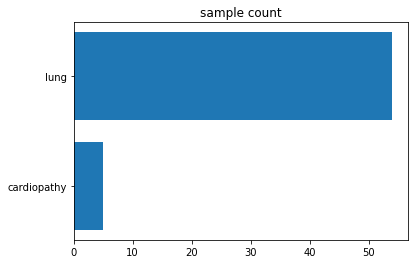

In [4]:
# 疾病分组统计样本量
plt.barh(data.groupby('disease')['code'].count().reset_index()['disease'], data.groupby('disease')['code'].count().reset_index()['code'])
plt.title("sample count")

,disease,subtype,stage,count,kind
2,lung,adenocarcinoma,primary,8,adenocarcinoma_primary
1,lung,adenocarcinoma,invasive,36,adenocarcinoma_invasive
3,lung,others,invasive,1,others_invasive
4,lung,squamous carcinoma,invasive,1,squamous carcinoma_invasive
5,lung,squamous carcinoma,unknow,8,squamous carcinoma_unknow


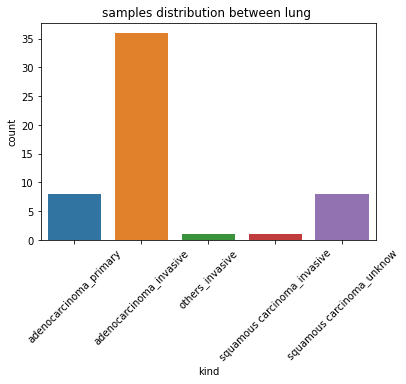

In [5]:
# 各样本数量
sample_count_df = data.groupby(['disease', 'subtype', 'stage']).count().reset_index().iloc[:,:4]
sample_count_df.rename(columns={"code": "count"}, inplace=True)
sample_count_df['kind'] = sample_count_df.apply(lambda x: x.subtype + "_" + x.stage, axis=1)
sample_count_df.sort_values(by=['disease', 'subtype', 'count'], inplace=True)
sample_count_df = sample_count_df[sample_count_df['disease']=='lung']
sns.barplot(x='kind', y='count', data=sample_count_df)
plt.xticks(rotation='45')
plt.title("samples distribution between lung ")

sample_count_df

##### 各miRNA基因表达量

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'his-miR-141-3P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-574-3P'),
  Text(3, 0, 'his-miR-181a-5P'),
  Text(4, 0, 'his-miR-375'),
  Text(5, 0, 'his-miR-629-5P'),
  Text(6, 0, 'his-miR-100-5P'),
  Text(7, 0, 'his-miR-154-3P'),
  Text(8, 0, 'his-miR-378a-3P'),
  Text(9, 0, 'his-miR-30a-3P'),
  Text(10, 0, 'his-miR-200b-5P'),
  Text(11, 0, 'his-miR-155-5P'),
  Text(12, 0, 'his-miR-21-5P')])

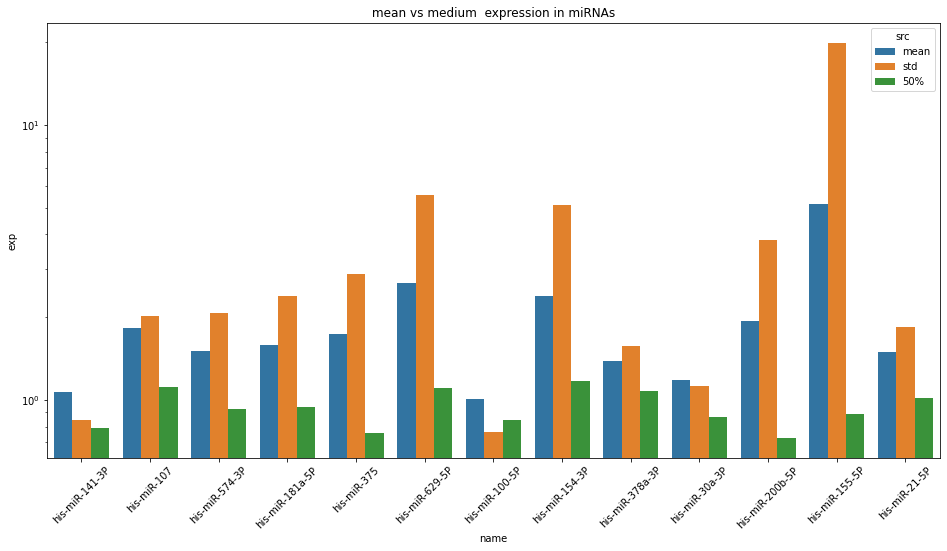

In [6]:
# 平均值
f, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale("log")
data_desc = data.describe().T
cols = ['mean', 'std', '50%']
data_desc = data_desc[cols]
data_desc.columns = pd.Index(cols, name='src')
data_desc.index = pd.Index(data_desc.index, name='name')
data_desc = data_desc.stack().reset_index().rename(columns={0:'exp'})

sns.barplot(x='name', y='exp', hue='src', data=data_desc)
plt.title(" mean vs medium  expression in miRNAs ")
plt.xticks(rotation='45')

# 各样本基因标准极大，提升可能有离群值 或 差异表达基因

Text(0.5, 1.0, 'miRNA expression')

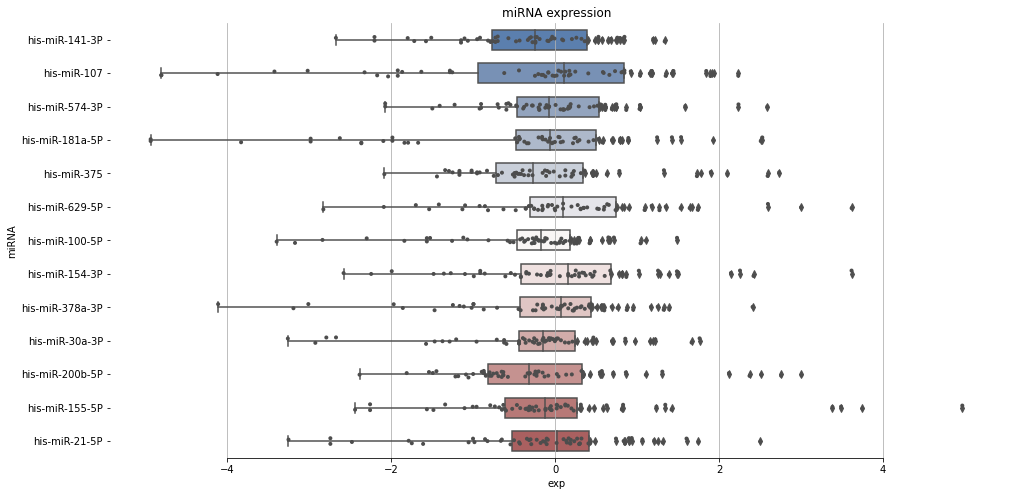

In [7]:
# 基因表达分布
f, ax = plt.subplots(figsize=(16, 8))
# ax.set_xscale("log")

gene_names = ['his-miR-141-3P', 'his-miR-107',
       'his-miR-574-3P', 'his-miR-181a-5P', 'his-miR-375', 'his-miR-629-5P',
       'his-miR-100-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-30a-3P',
       'his-miR-200b-5P', 'his-miR-155-5P', 'his-miR-21-5P']

mirna_exp = data[gene_names].stack().reset_index().iloc[:, 1:]
mirna_exp.columns = pd.Index(['miRNA', 'exp'])
mirna_exp['exp'] = mirna_exp['exp'].apply(lambda x: np.log(x))

sns.boxplot(x='exp', y='miRNA', data=mirna_exp, whis=[0, 2], width=.6, palette="vlag")
sns.stripplot(x="exp", y="miRNA", data=mirna_exp, size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.title("miRNA expression")

# 观察发现存在明显的离群值，离群明显的基因如['his-miR-107', 'his-miR-155-5P', 'his-miR-181a-5P', 'his-miR-378a-3P']  需要处理

#### 离群值处理
``` 使用箱线图```

Text(0.5, 1.0, 'miRNA expression')

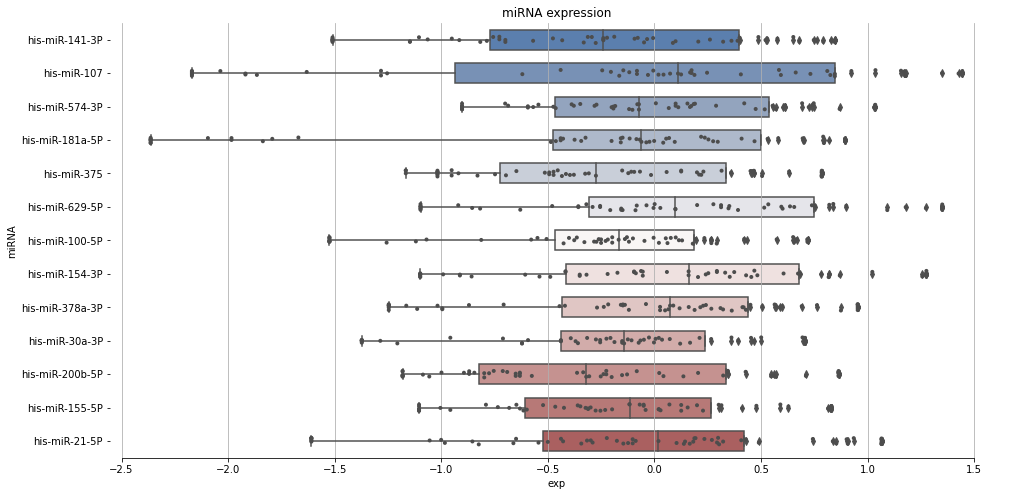

In [8]:
# 观察如下基因有明显的离群值

def get_outer_thres(x):
    """ 使用 box方法，寻找离群值，并用剔除离群值后的max/min分别替换离群值"""
    x = x.tolist()
    p10, p25, p75, xmax = np.percentile(x, [10, 25, 75, 100])
    IQR = p75 - p25
    # L = max(p25 - 1.5 * IQR, 0 ) # 全部为0, 无过滤作用
    L = max(p25 - 1.5 * IQR, p10 )
    H = min(p75 + 1.5 * IQR, xmax)
    nmax = max([i for i in x if H > i > L ])
    nmin = min([i for i in x if H > i > L ])
    # print(p25, p75, L, H, xmax, nmax, nmin)
    
    new_x = []
    for i in x:
        if i > H:
            i = nmax
        elif i < L:
            i = nmin
        
        new_x.append(i)
    
    return new_x


data2 = data.copy()
for gname in gene_names:
    data2[gname] = get_outer_thres(data2[gname])

mirna_exp2 = data2[gene_names]
mirna_exp2 = mirna_exp2.stack().reset_index().iloc[:,1:]
mirna_exp2.columns = pd.Index(['miRNA', 'exp'])
mirna_mean_exp2 = mirna_exp2.groupby('miRNA')['exp'].agg('mean').reset_index()
mirna_exp2['exp'] = mirna_exp2['exp'].apply(lambda x: np.log(x))
# mirna_exp2.sort_values(by=['miRNA', 'exp'], ascending=True, inplace=True)

f, ax = plt.subplots(figsize=(16, 8))
# ax.set_xscale("log")
sns.boxplot(x='exp', y='miRNA', data=mirna_exp2, whis=[0, 2], width=.6, palette="vlag")
sns.stripplot(x="exp", y="miRNA", data=mirna_exp2, size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.title("miRNA expression")
# 基因表达量离群值需要处理

In [9]:
data.columns

Index(['code', 'disease', 'subtype', 'stage', 'his-miR-141-3P', 'his-miR-107',
       'his-miR-574-3P', 'his-miR-181a-5P', 'his-miR-375', 'his-miR-629-5P',
       'his-miR-100-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-30a-3P',
       'his-miR-200b-5P', 'his-miR-155-5P', 'his-miR-21-5P'],
      dtype='object')

In [10]:
# ### 区分疾病的异常值处理

# lung_data = data[data['disease']=='lung']
# card_data = data[data['disease']=='cardiopathy']
# for gname in gene_names:
#     lung_data[gname] = get_outer_thres(lung_data[gname])
#     card_data[gname] = get_outer_thres(card_data[gname])

# data3 = pd.concat([card_data, lung_data])
# data3.sort_index(inplace=True)

#### 离异值处理前后比较

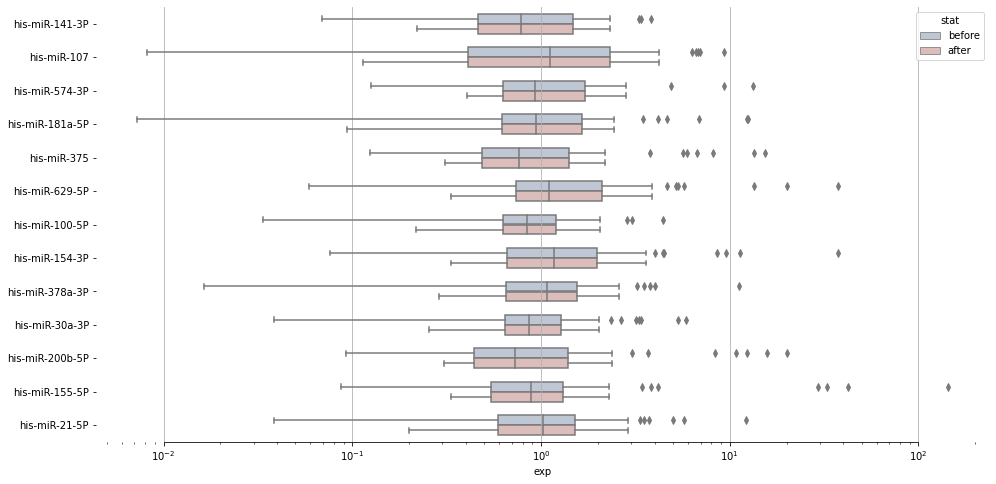

In [11]:
f, ax = plt.subplots(figsize=(16, 8))
ax.set_xscale("log")

before = data[gene_names].stack().reset_index()
after = data2[gene_names].stack().reset_index()
before['stat'] = ['before'] * len(before)
after['stat'] = ['after'] * len(after)
before_after = pd.concat([before, after]).iloc[:,1: ]
before_after.rename(columns={"level_1": "miRNA", 0: "exp" }, inplace=True)

sns.boxplot(x='exp', y='miRNA', data=before_after, hue='stat', width=.6, palette="vlag")
# sns.stripplot(x="exp", y="miRNA", data=before_after, hue='stat',
#               size=4, color=".3", linewidth=0, palette="vlag")

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'his-miR-100-5P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-141-3P'),
  Text(3, 0, 'his-miR-154-3P'),
  Text(4, 0, 'his-miR-155-5P'),
  Text(5, 0, 'his-miR-181a-5P'),
  Text(6, 0, 'his-miR-200b-5P'),
  Text(7, 0, 'his-miR-21-5P'),
  Text(8, 0, 'his-miR-30a-3P'),
  Text(9, 0, 'his-miR-375'),
  Text(10, 0, 'his-miR-378a-3P'),
  Text(11, 0, 'his-miR-574-3P'),
  Text(12, 0, 'his-miR-629-5P')])

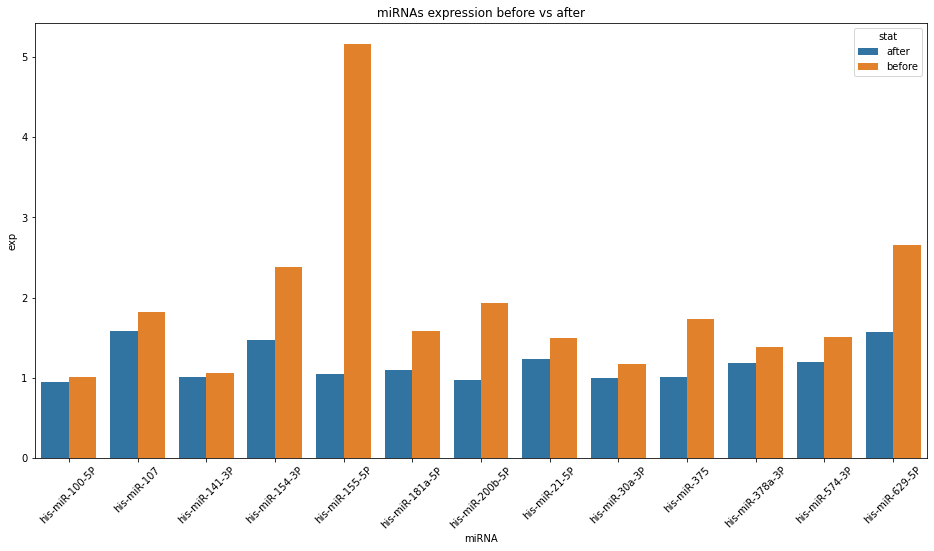

In [12]:
f, ax = plt.subplots(figsize=(16, 8))
before_after_mean = before_after.groupby(['miRNA', 'stat'])['exp'].agg('mean').reset_index()
sns.barplot(x='miRNA', y='exp', hue='stat', data=before_after_mean)
plt.title(" miRNAs expression before vs after ")
plt.xticks(rotation='45')


In [13]:
# f, ax = plt.subplots(figsize=(16, 8))
# ax.set_xscale("log")

# before = data[gene_names].stack().reset_index()
# after3 = data3[gene_names].stack().reset_index()
# before['stat'] = ['before'] * len(before)
# after3['stat'] = ['after3'] * len(after3)
# before_after3 = pd.concat([before, after3]).iloc[:,1: ]
# before_after3.rename(columns={"level_1": "miRNA", 0: "exp" }, inplace=True)

# sns.boxplot(x='exp', y='miRNA', data=before_after3, hue='stat', width=.6, palette="vlag")

# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

In [14]:
# f, ax = plt.subplots(figsize=(16, 8))
# before_after3_mean = before_after3.groupby(['miRNA', 'stat'])['exp'].agg('mean').reset_index()
# sns.barplot(x='miRNA', y='exp', hue='stat', data=before_after3_mean)
# plt.title(" miRNAs expression before vs after ")
# plt.xticks(rotation='45')


In [15]:
# data_ptable = pd.pivot_table(data, index='disease', aggfunc=np.mean)
# data2_ptable = pd.pivot_table(data2, index='disease', aggfunc=np.mean)
# data3_ptable = pd.pivot_table(data3, index='disease', aggfunc=np.mean)

# data_ptable = data_ptable.T
# data2_ptable = data2_ptable.T
# data3_ptable = data3_ptable.T

# data_ptable['stat'] = ['before'] * len(data_ptable)
# data2_ptable['stat'] = ['after'] * len(data2_ptable)
# data3_ptable['stat'] = ['after3'] * len(data3_ptable)

# berfor_after_disease = pd.concat([data_ptable, data2_ptable, data3_ptable])

# # data_ptable.describe()

In [16]:
# 基因平均表达量
data[gene_names].stack().reset_index(drop=True).mean(), data2[gene_names].stack().reset_index(drop=True).mean()

(1.915124641460234, 1.1763509778357237)

##### 表达量分析

In [17]:
# # 假设不处理

# data2 = data

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,miRNA,disease,exp
0,his-miR-100-5P,cardiopathy,1.264360
1,his-miR-100-5P,lung,0.915937
2,his-miR-107,cardiopathy,2.744980
3,his-miR-107,lung,1.469706
4,his-miR-141-3P,cardiopathy,0.579880
5,his-miR-141-3P,lung,1.053396
6,his-miR-154-3P,cardiopathy,3.583300
7,his-miR-154-3P,lung,1.273419
8,his-miR-155-5P,cardiopathy,2.158320
9,his-miR-155-5P,lung,0.944457


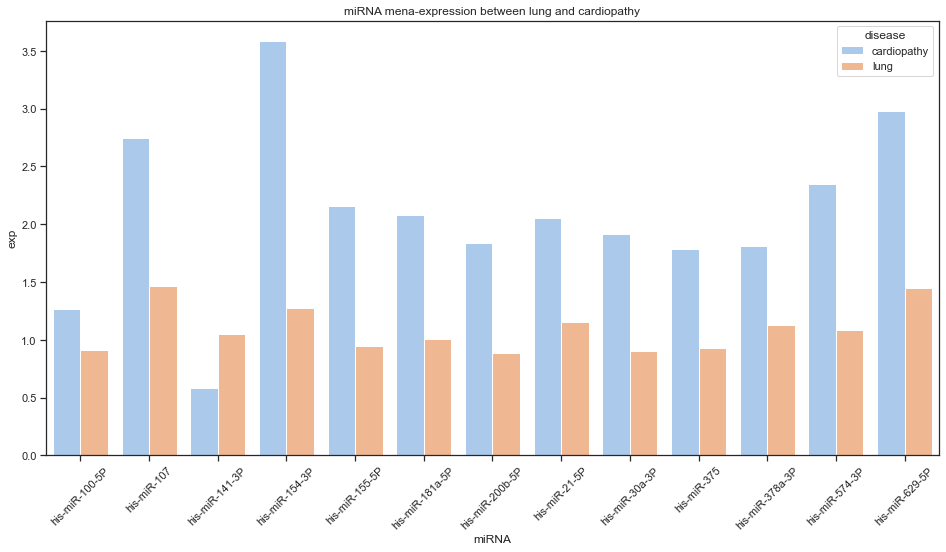

In [18]:
# 平局表达量
mean_exp_car_lung = pd.pivot_table(data2, index='disease', aggfunc='mean').T
mean_exp_car_lung = mean_exp_car_lung.stack().reset_index()
mean_exp_car_lung.columns = pd.Index(['miRNA', 'disease', 'exp'])

plt.figure(figsize=(16, 8))
sns.despine(offset=10, trim=True)
sns.set_theme(style="ticks", palette="pastel")
sns.barplot('miRNA', 'exp', hue='disease',  data=mean_exp_car_lung)
plt.xticks(rotation='45')
plt.title("miRNA mena-expression between lung and cardiopathy")

mean_exp_car_lung


In [19]:
all_sample_exp = []
for sample, row in data2.groupby('code'):
    gene_names = row.columns.tolist()[4: ]
    disease = row.disease.tolist()[0]
    subtype = row.subtype.tolist()[0]
    stage = row.stage.tolist()[0]
    # print("cols: ", disease, subtype, stage)
    for gene_name in gene_names:
        exp = row[gene_name].tolist()[0]
        all_sample_exp.append({
            "sample": sample,
            "disease": disease,
            "subtype": subtype,
            "stage": stage,
            "miRNA": gene_name,
            "exp": exp
        })

all_sample_exp = pd.DataFrame(all_sample_exp)
all_sample_exp['log_exp'] = all_sample_exp['exp'].apply(lambda x: np.log(1 + x))
all_sample_exp.describe()

,exp,log_exp
count,767.000000,767.000000
mean,1.176351,0.709522
std,0.862036,0.360068
min,0.094100,0.089932
25%,0.539550,0.431490
50%,0.923100,0.653938
75%,1.595000,0.953587
max,4.240600,1.656436


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

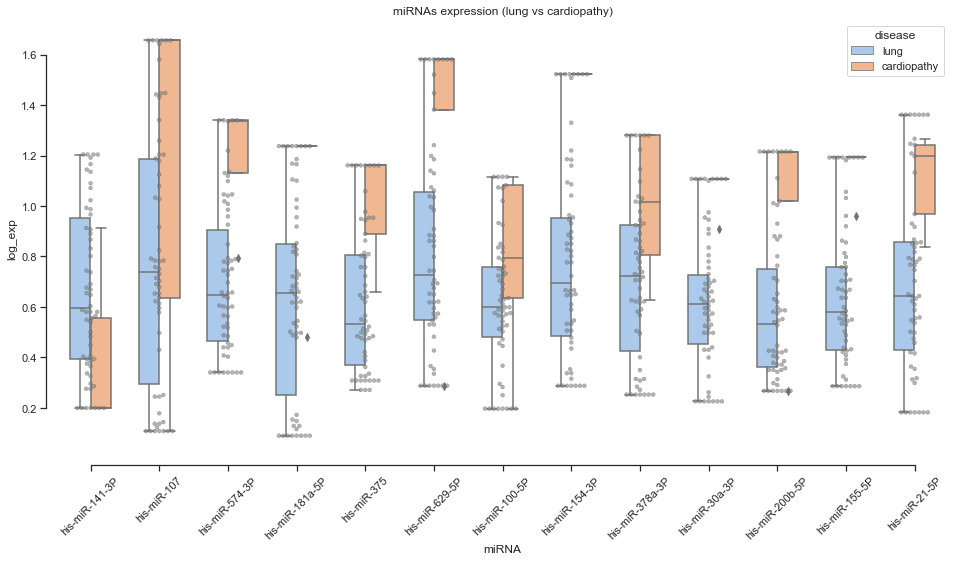

In [20]:
# 绘制mirna表达散点图
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(16 ,8))
sns.boxplot(x=all_sample_exp['miRNA'], y=all_sample_exp['log_exp'], hue=all_sample_exp['disease'],
            palette="pastel", 
            width=.6)
sns.swarmplot(data=all_sample_exp, x='miRNA', y='log_exp',  color='grey', 
              size=4, linewidth=0.2, edgecolor='k', alpha=0.6)

# sns.violinplot(data=all_sample_exp, x='miRNA', y='log_exp', hue=all_sample_exp['disease'])
sns.despine(offset=10, trim=True)
plt.title('miRNAs expression (lung vs cardiopathy)')
plt.xticks(rotation='45')
# 肺癌、心脏病miRNA表达差异明显

#### # 肺癌基因平均表达水平

In [21]:
lung_exp = all_sample_exp[all_sample_exp['disease']=='lung']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

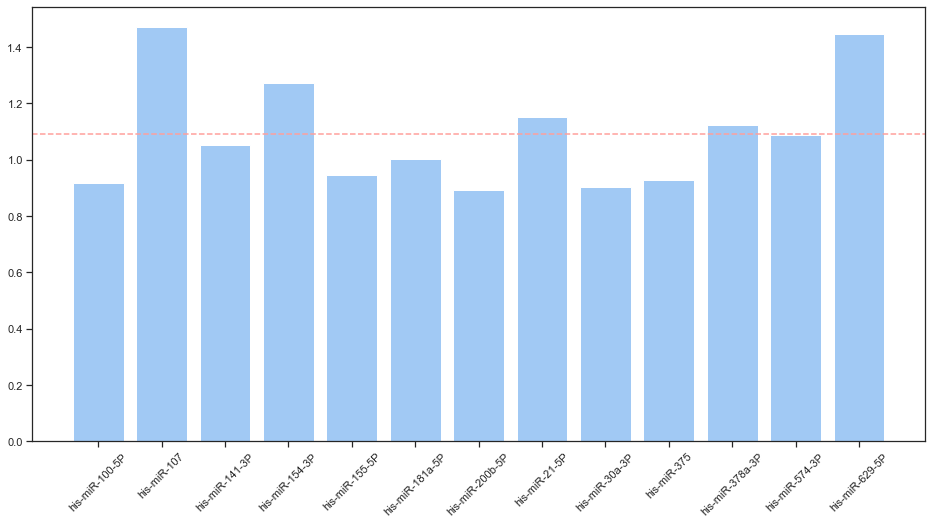

In [22]:
# 肺癌基因平均表达水平
plt.figure(figsize=(16, 8))
lung_exp_mean = lung_exp.groupby(['miRNA'])['exp'].agg('mean').reset_index()
plt.bar('miRNA', 'exp', data=lung_exp_mean)
plt.axhline(y=lung_exp['exp'].mean(), ls='--', c='r') 
plt.xticks(rotation='45')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'his-miR-100-5P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-141-3P'),
  Text(3, 0, 'his-miR-154-3P'),
  Text(4, 0, 'his-miR-155-5P'),
  Text(5, 0, 'his-miR-181a-5P'),
  Text(6, 0, 'his-miR-200b-5P'),
  Text(7, 0, 'his-miR-21-5P'),
  Text(8, 0, 'his-miR-30a-3P'),
  Text(9, 0, 'his-miR-375'),
  Text(10, 0, 'his-miR-378a-3P'),
  Text(11, 0, 'his-miR-574-3P'),
  Text(12, 0, 'his-miR-629-5P')])

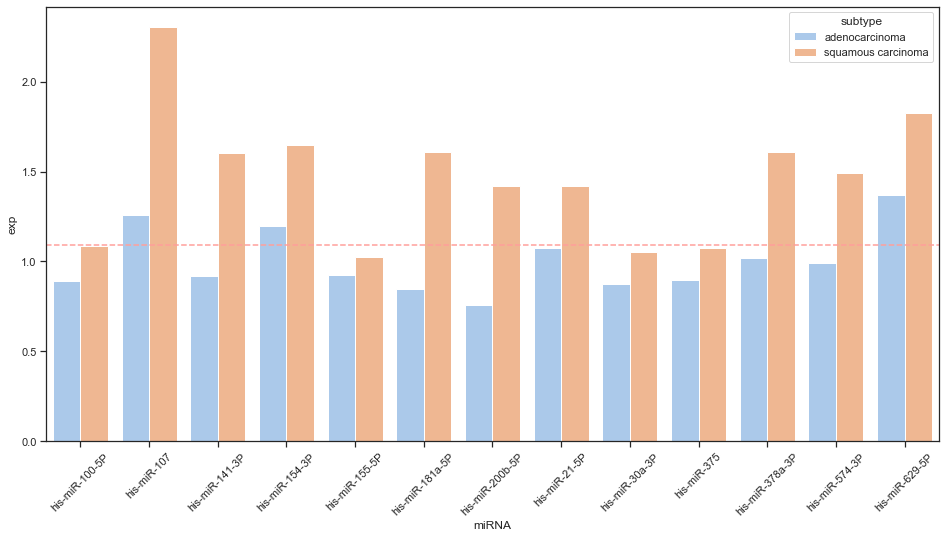

In [23]:
# 各亚型平均表达水平（只有一例分类others不明确，暂时忽略）
lung_mean_exp = lung_exp.groupby(['subtype', 'miRNA'])['exp'].agg('mean').reset_index()

plt.figure(figsize=(16, 8))
plt.axhline(y=lung_exp['exp'].mean(), ls='--', c='r') 
sns.barplot(x='miRNA', y='exp', data=lung_mean_exp[lung_mean_exp['subtype'] !='others'], hue='subtype') 
plt.xticks(rotation='45')

<AxesSubplot:xlabel='exp', ylabel='subtype'>

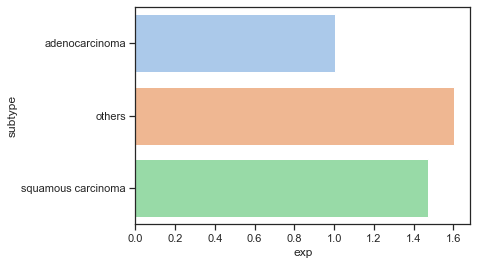

In [24]:
sns.barplot(x='exp', y='subtype', data=lung_exp.groupby(['subtype'])['exp'].agg('mean').reset_index())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

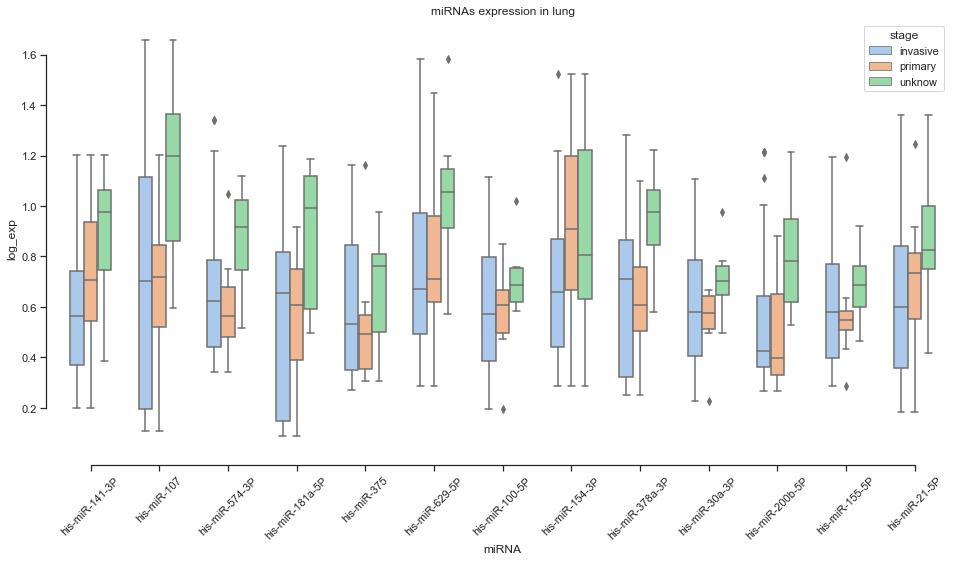

In [25]:
lung_exp = all_sample_exp[all_sample_exp['disease']=='lung']

# 绘制mirna表达散点图
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(16 ,8))
sns.boxplot(x=lung_exp['miRNA'], y=lung_exp['log_exp'], hue=lung_exp['stage'],
            palette="pastel", 
            width=.6)
# sns.swarmplot(data=lung_exp, x='miRNA', y='log_exp',  color='grey', 
#               size=4, linewidth=0.2, edgecolor='k', alpha=0.6)

# sns.violinplot(data=lung_exp, x='miRNA', y='log_exp', hue=lung_exp['stage'])
sns.despine(offset=10, trim=True)
plt.title('miRNAs expression in lung')
plt.xticks(rotation='45')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'his-miR-100-5P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-141-3P'),
  Text(3, 0, 'his-miR-154-3P'),
  Text(4, 0, 'his-miR-155-5P'),
  Text(5, 0, 'his-miR-181a-5P'),
  Text(6, 0, 'his-miR-200b-5P'),
  Text(7, 0, 'his-miR-21-5P'),
  Text(8, 0, 'his-miR-30a-3P'),
  Text(9, 0, 'his-miR-375'),
  Text(10, 0, 'his-miR-378a-3P'),
  Text(11, 0, 'his-miR-574-3P'),
  Text(12, 0, 'his-miR-629-5P')])

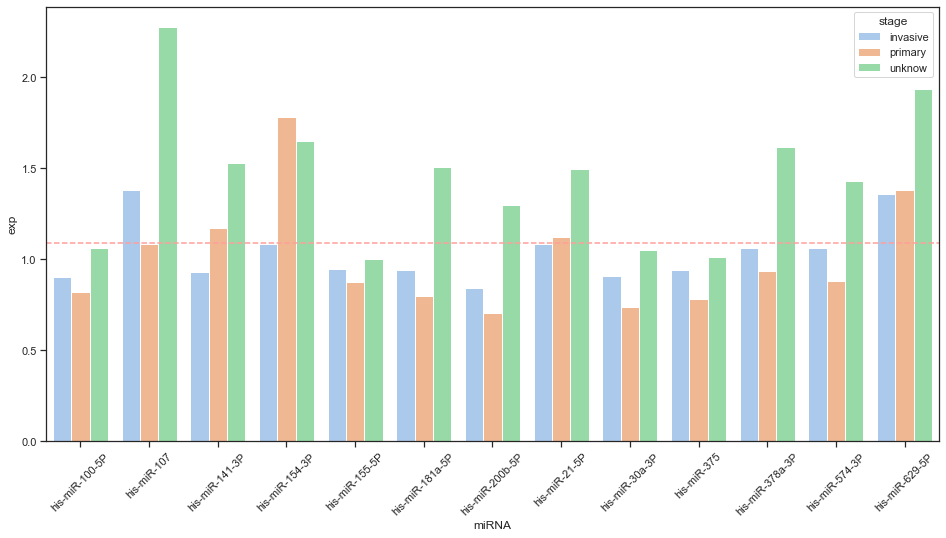

In [26]:
# 各分期平均表达水平
lung_mean_exp = lung_exp.groupby(['stage', 'miRNA'])['exp'].agg('mean').reset_index()

plt.figure(figsize=(16, 8))
plt.axhline(y=lung_exp['exp'].mean(), ls='--', c='r') 
sns.barplot(x='miRNA', y='exp', data=lung_mean_exp, hue='stage') 
plt.xticks(rotation='45')

In [27]:
# 颜色设置
import random
random.seed(2023)
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

# rgbs = [randomcolor() for _ in range(20) ]
rgbs = ['#FF0000', '#DAA520', '#32CD32', '#0000FF', '#CD5C5C',
        '#FFA500', '#FF1493', '#D8BFD8', '#8B8989', '#CD4F39',
        '#EE00EE', '#00008B', '#1C1C1C', '#008B8B', '#90EE90']


['lung' 'cardiopathy']
方差贡献率： [0.61522784 0.12662811] 0.7418559504076753


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'PCA show disease')

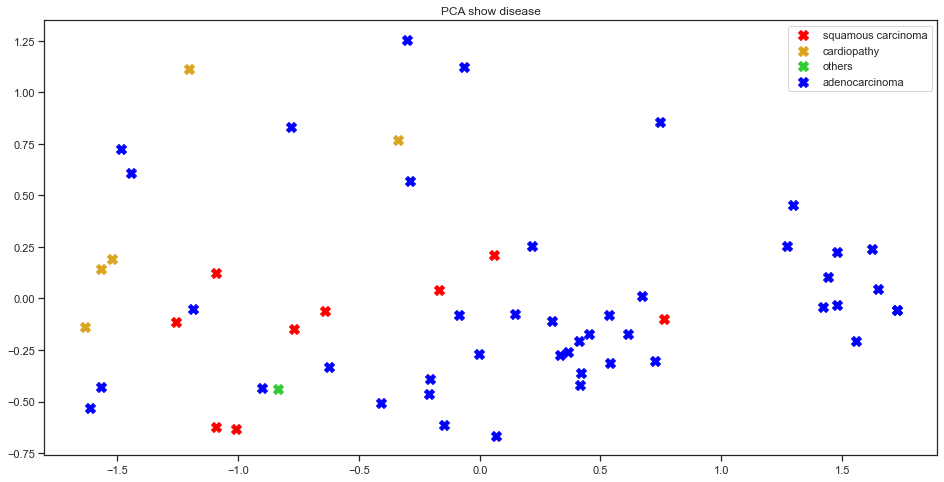

In [28]:
## PCA : 根据疾病聚类

print(data2['disease'].unique())
exp_pca1 = data2[gene_names]

# 设置数据集要降低的维度
for c in exp_pca1.columns:
    exp_pca1[c] = exp_pca1[c].apply(lambda x: np.log(x + 1))
    # print(c, )

num = 2
y = data2['disease'].tolist()
y = data2['subtype'].tolist()
# y = data2['stage'].tolist()
pca = PCA(n_components=num)
# 降维后数据
reduced_x = pca.fit_transform(exp_pca1)

print("方差贡献率：", pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))

red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]

y_set = list(set(y))
scatter_data = []
for i in range(len(reduced_x)):
    scatter_data.append([reduced_x[i][0], reduced_x[i][1], y[i]])
    
    # if y[i]=='lung':
    #     red_x.append(reduced_x[i][0])
    #     red_y.append(reduced_x[i][1])
    # elif y[i]== 'cardiopathy':
    #     blue_x.append(reduced_x[i][0])
    #     blue_y.append(reduced_x[i][1])
    # else:
    #     green_x.append(reduced_x[i][0])
    #     green_y.append(reduced_x[i][1])


plt.figure(figsize=(16, 8))
# plt.scatter(red_x, red_y, c=rgbs[0], marker='x', label='lung')
# plt.scatter(blue_x, blue_y, c=rgbs[1], marker='o', label='cardiopathy' )
# plt.scatter(green_x, green_y, c=rgbs[2], marker='.', label='others' )

for i, k in enumerate(y_set):
    kx = [c[0] for c in scatter_data if c[2] == k]
    ky = [c[1] for c in scatter_data if c[2] == k]
    plt.scatter(kx, ky, c = rgbs[i], marker='X', label=k, s=100)

plt.legend()
plt.title("PCA show disease")
# 按疾病 2d PCA结果显示：
# 1. 肺癌、心脏病 miRNA表达区分明显，
# 2. 肺癌不同类型有一定差异（肺腺癌 vs 肺鳞癌）

方差贡献率： [0.35159986 0.19520839] 0.5468082482503123


Text(0.5, 1.0, 'PCA show miRNAs ')

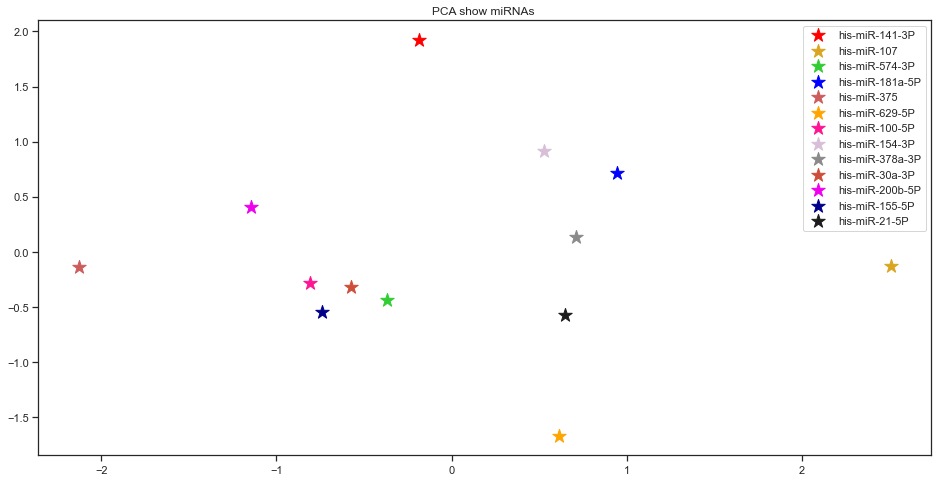

In [29]:

## 按基因降维聚类
exp_pca2 = data2[['code', 'his-miR-141-3P', 'his-miR-107',
       'his-miR-574-3P', 'his-miR-181a-5P', 'his-miR-375', 'his-miR-629-5P',
       'his-miR-100-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-30a-3P',
       'his-miR-200b-5P', 'his-miR-155-5P', 'his-miR-21-5P']]

exp_pca2 = exp_pca2.set_index('code').T
y2 = exp_pca2.index.tolist()

# 数据预处理
for p in exp_pca2.columns:
       exp_pca2[p] = exp_pca2[p].apply(lambda x: np.log(x + 1))

# 为方便取前两维特征
pca2 = PCA(n_components=2)
# 降维后数据
reduced_x2 = pca2.fit_transform(exp_pca2)
print("方差贡献率：", pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_))

# 可视化
plt.figure(figsize=(16, 8))
for i in range(len(reduced_x2)):
       plt.scatter(reduced_x2[i][0], reduced_x2[i][1], c=rgbs[i], marker='*', label=y2[i], s=200)
    
plt.legend()
plt.title("PCA show miRNAs ")
# 按基因 2d PCA结果显示：
# 1. 部分基因成簇明显
# cluster1: 6个，最后一个差异较大，列表： ['his-miR-100-5P', 'his-miR-200b-5P', 'his-miR-30a-3P', 'his-miR-155-5P', 'his-miR-574-3P', 'his-miR-375']
# cluster2: 4个，列表：['his-miR-181a-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-21-5P']
# 2. 部分基因未成簇：'his-miR-141-3P', 'his-miR-107', 'his-miR-629-5P'


In [30]:
all_sample_exp

,sample,disease,subtype,stage,miRNA,exp,log_exp
0,P001,lung,adenocarcinoma,invasive,his-miR-141-3P,0.7870,0.580538
1,P001,lung,adenocarcinoma,invasive,his-miR-107,0.1305,0.122660
2,P001,lung,adenocarcinoma,invasive,his-miR-574-3P,0.5664,0.448780
3,P001,lung,adenocarcinoma,invasive,his-miR-181a-5P,0.1593,0.147816
4,P001,lung,adenocarcinoma,invasive,his-miR-375,1.2212,0.798048
...,...,...,...,...,...,...,...
762,P120,lung,adenocarcinoma,invasive,his-miR-378a-3P,1.2735,0.821320
763,P120,lung,adenocarcinoma,invasive,his-miR-30a-3P,2.0269,1.107539
764,P120,lung,adenocarcinoma,invasive,his-miR-200b-5P,0.4501,0.371633
765,P120,lung,adenocarcinoma,invasive,his-miR-155-5P,2.2595,1.181574


```
# 按基因 2d PCA结果显示：
# 1. 部分基因成簇明显
# cluster1: 6个，最后一个差异较大，列表： ['his-miR-100-5P', 'his-miR-200b-5P', 'his-miR-30a-3P', 'his-miR-155-5P', 'his-miR-574-3P', 'his-miR-375']
# cluster2: 4个，列表：['his-miR-181a-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-21-5P']
# 2. 部分基因未成簇：'his-miR-141-3P', 'his-miR-107', 'his-miR-629-5P'

```

In [31]:
all_mirna_matrix = data2[gene_names]
all_mirna_matrix.index = pd.Index(data2['code'].tolist(), name='code')
all_mirna_matrix.columns = pd.Index(gene_names, name='miRNA')
all_mirna_matrix = all_mirna_matrix.stack().reset_index().rename(columns={0: 'exp'})
all_mirna_matrix2 = data2[['code', 'disease', 'subtype', 'stage']]
all_mirna_matrix = pd.merge(all_mirna_matrix2, all_mirna_matrix, on='code')
all_mirna_matrix

,code,disease,subtype,stage,miRNA,exp
0,P001,lung,adenocarcinoma,invasive,his-miR-141-3P,0.7870
1,P001,lung,adenocarcinoma,invasive,his-miR-107,0.1305
2,P001,lung,adenocarcinoma,invasive,his-miR-574-3P,0.5664
3,P001,lung,adenocarcinoma,invasive,his-miR-181a-5P,0.1593
4,P001,lung,adenocarcinoma,invasive,his-miR-375,1.2212
...,...,...,...,...,...,...
762,P120,lung,adenocarcinoma,invasive,his-miR-378a-3P,1.2735
763,P120,lung,adenocarcinoma,invasive,his-miR-30a-3P,2.0269
764,P120,lung,adenocarcinoma,invasive,his-miR-200b-5P,0.4501
765,P120,lung,adenocarcinoma,invasive,his-miR-155-5P,2.2595


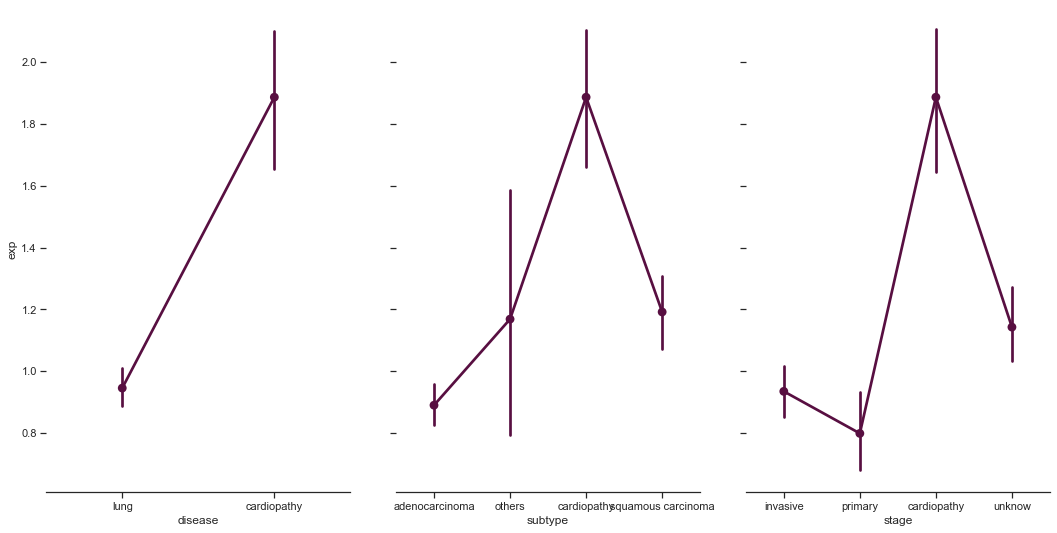

In [32]:

cluster1 = ['his-miR-100-5P', 'his-miR-200b-5P', 'his-miR-30a-3P', 'his-miR-155-5P', 'his-miR-574-3P', 'his-miR-375']
cluster2 = ['his-miR-181a-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-21-5P']
no_cluster = ['his-miR-141-3P', 'his-miR-107', 'his-miR-629-5P']

all_mirna_matrix_x = all_mirna_matrix[all_mirna_matrix['miRNA'].isin(cluster1)]

g = sns.PairGrid(all_mirna_matrix_x, y_vars="exp",
                 x_vars=["disease", "subtype", "stage"],
                # x_vars=["subtype", "stage"],
                 height=5, aspect=.5)

g.map(sns.pointplot,  color="xkcd:plum")
g.fig.set_size_inches(16, 8)

sns.despine(fig=g.fig, left=True)


In [33]:
all_mirna_matrix.head()

,code,disease,subtype,stage,miRNA,exp
0,P001,lung,adenocarcinoma,invasive,his-miR-141-3P,0.7870
1,P001,lung,adenocarcinoma,invasive,his-miR-107,0.1305
2,P001,lung,adenocarcinoma,invasive,his-miR-574-3P,0.5664
3,P001,lung,adenocarcinoma,invasive,his-miR-181a-5P,0.1593
4,P001,lung,adenocarcinoma,invasive,his-miR-375,1.2212


#### 基因表达一致性分析

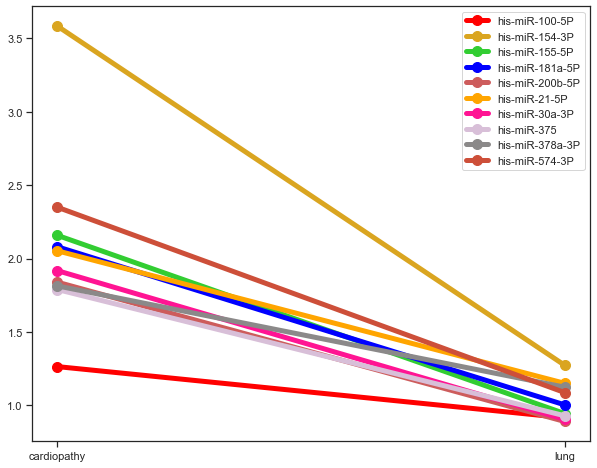

In [34]:
def show_reg(df, src_name = 'disease'):
    """"""
    feat_name = 'miRNA'
    fig, ax = plt.subplots(figsize=(10, 8))
    tdf = df.groupby(by=[src_name, 'miRNA'])['exp'].agg('mean').reset_index()
    feats = tdf[feat_name].unique().tolist()
    for i, f in enumerate(feats):
        fy = tdf[tdf[feat_name]==f]['exp'].tolist()
        fx = tdf[tdf[feat_name]==f][src_name].tolist()
        ax.plot(fx, fy,  label=f, marker='o',  c=rgbs[i], markersize =10, lw=5)
        ax.legend()
    plt.show()


# 成簇基因
all_mirna_matrix_clusters = all_mirna_matrix[all_mirna_matrix['miRNA'].isin(cluster1 + cluster2)]
# 未成簇基因
all_mirna_matrix_no_clusters = all_mirna_matrix[all_mirna_matrix['miRNA'].isin(no_cluster)]
# 成簇基因 -- 肺癌
all_mirna_matrix_clusters_lung = all_mirna_matrix_clusters[(all_mirna_matrix_clusters['disease']=='lung')]
all_mirna_matrix_clusters_cardiopathy = all_mirna_matrix_clusters[(all_mirna_matrix_clusters['disease']=='cardiopathy')]
# 未成簇基因 -- 肺癌
all_mirna_matrix_no_clusters_lung = all_mirna_matrix_no_clusters[(all_mirna_matrix_no_clusters['disease']=='lung')]
all_mirna_matrix_no_clusters_cardiopathy = all_mirna_matrix_no_clusters[(all_mirna_matrix_no_clusters['disease']=='cardiopathy')]

all_mirna_matrix_lung = all_mirna_matrix[all_mirna_matrix['disease']=='lung']

# 肺癌 vs 心脏病：成簇基因
show_reg(all_mirna_matrix_clusters, 'disease')

In [35]:
all_mirna_matrix_lung.groupby('disease')

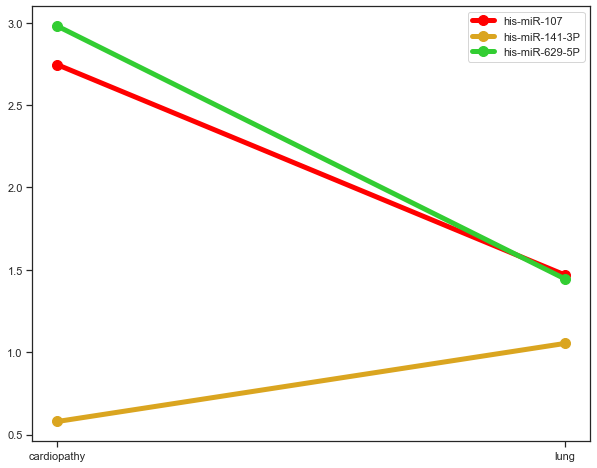

In [36]:
# 肺癌 vs 心脏病：未成簇基因
show_reg(all_mirna_matrix_no_clusters)

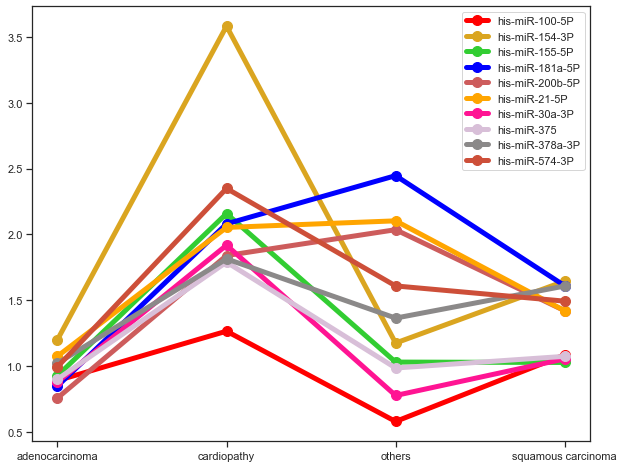

In [37]:
# 不同亚新：成簇基因
show_reg(all_mirna_matrix_clusters, 'subtype')

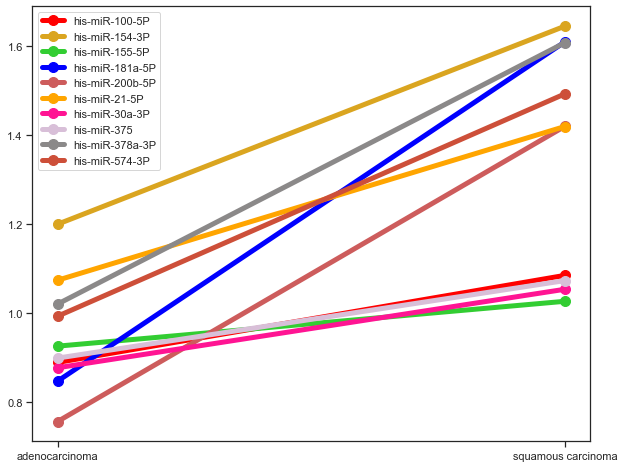

In [38]:
# # 肺癌不同亚型(肺腺癌 vs 肺鳞癌)：成簇基因
show_reg(all_mirna_matrix_clusters_lung[all_mirna_matrix_clusters_lung['subtype']!='others'], 'subtype')

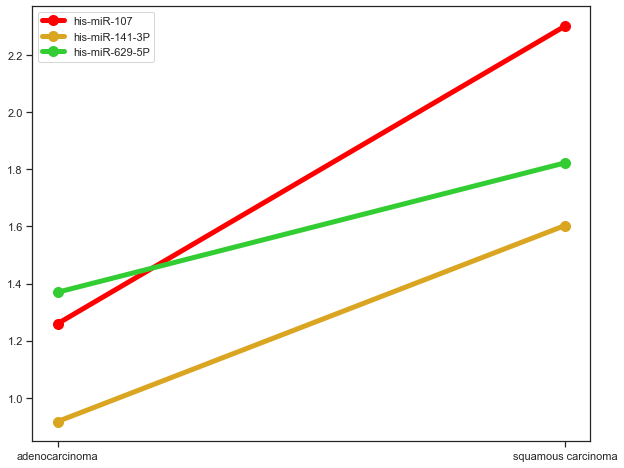

In [39]:
# 肺癌不同亚型(肺腺癌 vs 肺鳞癌)：未成簇基因
show_reg(all_mirna_matrix_no_clusters_lung[all_mirna_matrix_no_clusters_lung['subtype']!='others'], 'subtype')

In [40]:
all_mirna_matrix_clusters_lung

,code,disease,subtype,stage,miRNA,exp
2,P001,lung,adenocarcinoma,invasive,his-miR-574-3P,0.5664
3,P001,lung,adenocarcinoma,invasive,his-miR-181a-5P,0.1593
4,P001,lung,adenocarcinoma,invasive,his-miR-375,1.2212
6,P001,lung,adenocarcinoma,invasive,his-miR-100-5P,0.3266
7,P001,lung,adenocarcinoma,invasive,his-miR-154-3P,0.5833
...,...,...,...,...,...,...
762,P120,lung,adenocarcinoma,invasive,his-miR-378a-3P,1.2735
763,P120,lung,adenocarcinoma,invasive,his-miR-30a-3P,2.0269
764,P120,lung,adenocarcinoma,invasive,his-miR-200b-5P,0.4501
765,P120,lung,adenocarcinoma,invasive,his-miR-155-5P,2.2595


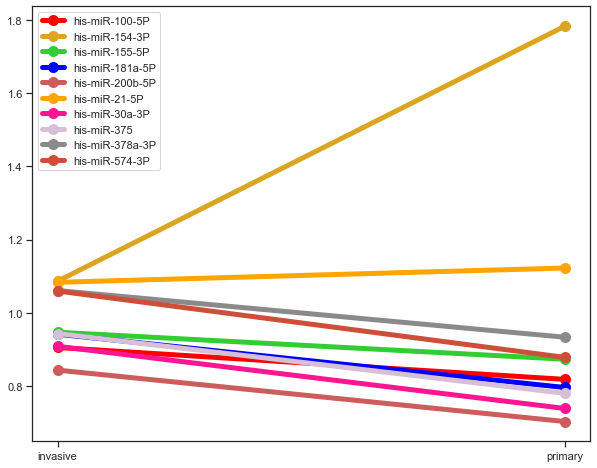

In [41]:

# # 肺癌不同亚型(肺腺癌 vs 肺鳞癌)：成簇基因
show_reg(all_mirna_matrix_clusters_lung[all_mirna_matrix_clusters_lung['stage'].isin(['invasive', 'primary'])], 'stage')

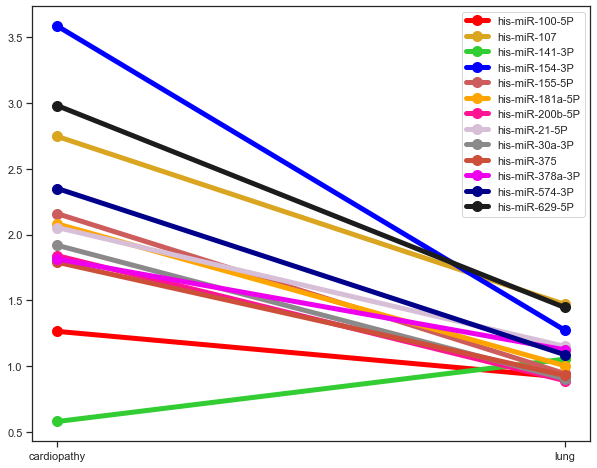

In [42]:
### 合并

# 除'his-miR-141-3P'外，其他12个基因表达 在肺癌和心脏病样本中有强一致性
# 说明：'his-miR-141-3P'外，miRNA在心脏病中为高表达，肺癌中低表达
show_reg(all_mirna_matrix, 'disease')


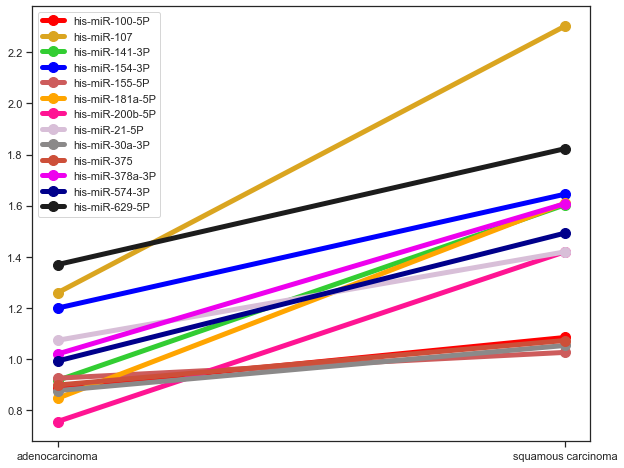

In [43]:
# # 肺癌分期：others只有一例，可以暂不考虑 
show_reg(all_mirna_matrix_lung[all_mirna_matrix_lung['subtype']!='others'], 'subtype')


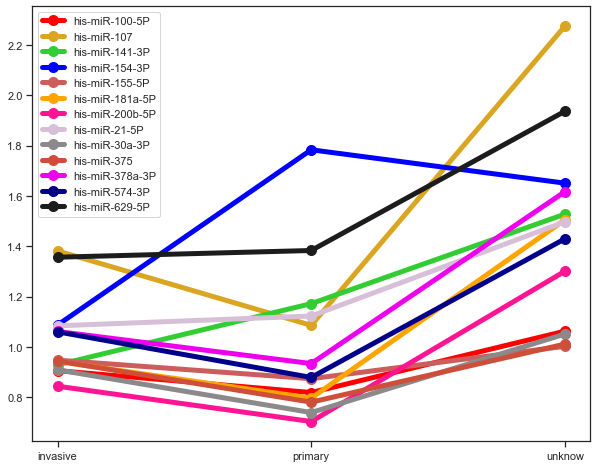

In [44]:
# 肺癌stage -unknow有8例，
show_reg(all_mirna_matrix_lung, 'stage')

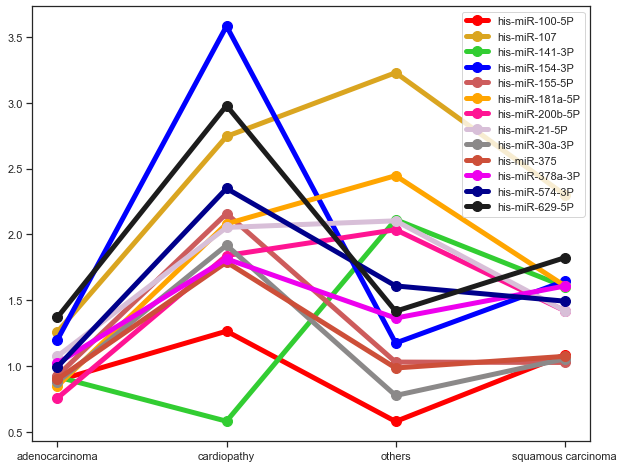

In [45]:
show_reg(all_mirna_matrix, 'subtype')

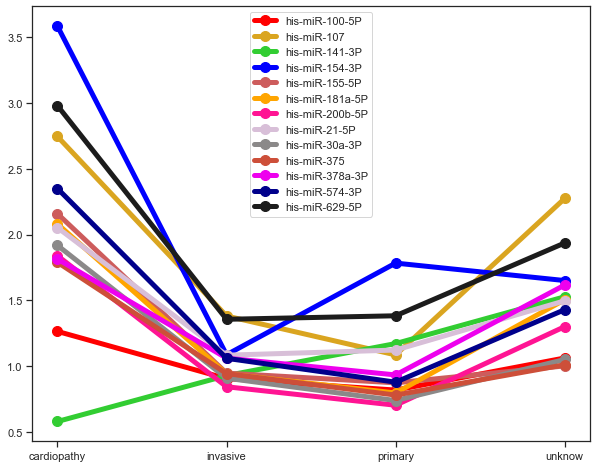

In [46]:
show_reg(all_mirna_matrix, 'stage')

### 显著性分析

In [47]:
#数学包
from scipy import stats
import pandas as pd
import numpy as np

#统计检验
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# anova_lm就是为模型产生一个方差分析表。
# 方差分析前需要进行：独立性、正态性、方差齐性

#### 单因素方差分析

```
# 参考：https://blog.csdn.net/csdn1561168266/article/details/129216380
# https://zhuanlan.zhihu.com/p/187520249
```

In [48]:

## 观察不同疾病间基因表达是否有显著差异
# 分析不同疾病间表达量是否差异

vlaue_name = 'exp'
cat_name = 'disease'
fml=vlaue_name+'~C('+cat_name+')'
model_disease_exp = ols(fml,data=all_sample_exp).fit() # ols（）创建一线性回归分析模型
anova_disease_exp_table=anova_lm(model_disease_exp)# anova_lm（）函数创建模型生成方差分析表

# df为自由度，sum_sq为误差平方和，mean_sq为平均平方，F代表统计量F值，PR(>F)代表显著性水平P值
# 结果说明：不同疾病间基因表达有极显著差异（F-value 5.370104e-20 < 0.01 ）
anova_disease_exp_table

,df,sum_sq,mean_sq,F,PR(>F)
C(disease),1.0,59.121425,59.121425,88.665185,5.370104e-20
Residual,765.0,510.097510,0.666794,NaN,NaN


In [49]:
# 进行事后比较分析
# pairwise_tukeyhsd可以用来比较因素A和因素B不同水平下的均值是否有显著差异
# 下半部分为多重比较，进行事后分析，group1以及group2表示的是因子的不同水平，
# 然后分析他们两个组是否有显著性差异，最后面的reject表示是否拒绝原假设，True表示的是拒绝原假设，
# 说明两组均值有显著性差异(肺癌 和 心脏病 )
pairwise_tukeyhsd_disease_exp = pairwise_tukeyhsd(all_sample_exp['exp'], all_sample_exp['disease'])
print(pairwise_tukeyhsd_disease_exp)
# 多重比较结果说明：在疾病因素下，cardiopathy - lung 两种疾病有显著差异，和前面的数据预览结论一致

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1   group2 meandiff p-adj  lower   upper  reject
--------------------------------------------------------
cardiopathy   lung  -0.9969 0.001 -1.2047 -0.7891   True
--------------------------------------------------------


In [50]:
# 基因层面分析
vlaue_name = 'exp'
cat_name = 'miRNA'
fml=vlaue_name+'~C('+cat_name+')'
model_gene_exp = ols(fml,data=all_sample_exp).fit() # ols（）创建一线性回归分析模型
anova_gene_exp_table=anova_lm(model_gene_exp)# anova_lm（）函数创建模型生成方差分析表
print(anova_gene_exp_table)
# 基因差异显著

             df      sum_sq   mean_sq         F    PR(>F)
C(miRNA)   12.0   36.561904  3.046825  4.312918  0.000001
Residual  754.0  532.657031  0.706442       NaN       NaN


In [51]:
# 既然基因表达有差异，哪哪种基因有显著影响？做pairwise_tukeyhsd分析

pairwise_tukeyhsd_gene_exp = pairwise_tukeyhsd(all_sample_exp['exp'], all_sample_exp['miRNA'])
print(pairwise_tukeyhsd_gene_exp)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
 his-miR-100-5P     his-miR-107   0.6323 0.0033   0.118  1.1466   True
 his-miR-100-5P  his-miR-141-3P   0.0678    0.9 -0.4465  0.5821  False
 his-miR-100-5P  his-miR-154-3P   0.5237 0.0415  0.0094   1.038   True
 his-miR-100-5P  his-miR-155-5P   0.1019    0.9 -0.4125  0.6162  False
 his-miR-100-5P his-miR-181a-5P   0.1496    0.9 -0.3648  0.6639  False
 his-miR-100-5P his-miR-200b-5P   0.0255    0.9 -0.4888  0.5399  False
 his-miR-100-5P   his-miR-21-5P   0.2815 0.8185 -0.2328  0.7959  False
 his-miR-100-5P  his-miR-30a-3P   0.0451    0.9 -0.4692  0.5594  False
 his-miR-100-5P     his-miR-375   0.0569    0.9 -0.4574  0.5712  False
 his-miR-100-5P his-miR-378a-3P   0.2375    0.9 -0.2768  0.7518  False
 his-miR-100-5P  his-miR-574-3P   0.2492    0.9 -0.2652  0.7635  False
 his-m

d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='disease', ylabel='log_exp'>

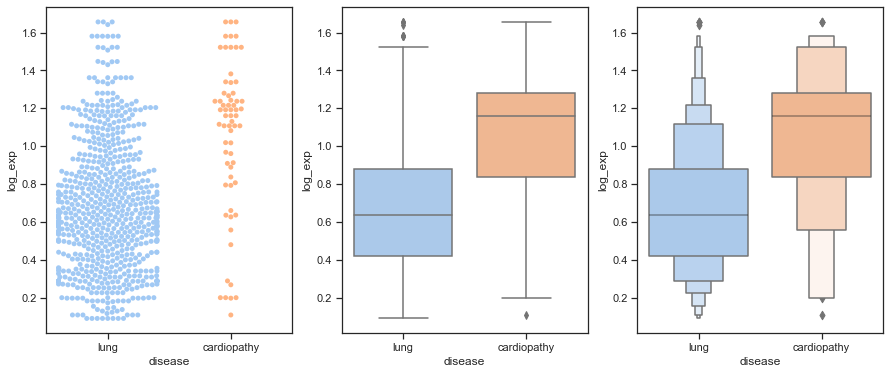

In [52]:
# 肺癌、心脏病表达值
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))
sns.swarmplot(x=all_sample_exp['disease'], y=all_sample_exp['log_exp'], palette="pastel", ax=axs[0])
sns.boxplot(x=all_sample_exp['disease'], y=all_sample_exp['log_exp'], palette="pastel", ax=axs[1])
sns.boxenplot(x=all_sample_exp['disease'], y=all_sample_exp['log_exp'], palette="pastel", ax=axs[2])

#### 双因素方差分析
```
## 双因素方差分析

# https://blog.csdn.net/fulk6667g78o8/article/details/115033649
# https://cloud.tencent.com/developer/article/2151861
# https://blog.csdn.net/qq_35125180/article/details/108031734
# 需要将数据制作为两因素情况 【疾病 vs 基因】
```

In [53]:
# 考虑 疾病 和 基因两种因素 （无交互作用的双因素方差分析）

# 构造数据
data2_anov2 = data2[gene_names]
data2_anov2.index = pd.Index(data2['disease'].tolist(), name='disease')
data2_anov2.columns = pd.Index(gene_names, name='miRNA')
data2_anov2 = data2_anov2.stack().reset_index().rename(columns={0:'exp'})
data2_anov2


model_anov2 = ols('exp~C(disease) + C(miRNA)', data2_anov2).fit() # 模型拟合
anova_2f_midrna_disease_exp_table = anova_lm(model_anov2) # 生成方差分析表
anova_2f_midrna_disease_exp_table

# 双因素方差分析结果说明：
# 1. 对diseas因素来说，因为其p = 5.000137e-21，小于显著性水平α = 0.01，因此拒绝原假设，有理由相信不同疾病间基因的表达量是有显著差异。
# 2. 对基因因素来讲，不同基因间表达量差异显著


,df,sum_sq,mean_sq,F,PR(>F)
C(disease),1.0,59.121425,59.121425,94.012852,5.000137e-21
C(miRNA),12.0,36.561904,3.046825,4.844957,1.025390e-07
Residual,753.0,473.535606,0.628865,NaN,NaN


In [54]:
# 考虑 疾病 和 基因两种因素 （有交互作用的双因素方差分析）

model_anov2_2 = ols('exp~C(disease) + C(miRNA)+C(disease):C(miRNA)', data2_anov2).fit()
anova_2f_midrna_disease_exp_table2 = anova_lm(model_anov2_2) 
anova_2f_midrna_disease_exp_table2

# 结果说明：disease，miRNA及基因+疾病交互作用 疾病表达量影响显著

,df,sum_sq,mean_sq,F,PR(>F)
C(disease),1.0,59.121425,59.121425,97.133137,1.290274e-21
C(miRNA),12.0,36.561904,3.046825,5.005761,4.906245e-08
C(disease):C(miRNA),12.0,22.515727,1.876311,3.082672,2.855739e-04
Residual,741.0,451.019879,0.608664,NaN,NaN


In [55]:
pairwise_tukeyhsd_miRNA_exp222 = pairwise_tukeyhsd(data2_anov2[data2_anov2['disease']=='lung']['exp'], data2_anov2[data2_anov2['disease']=='lung']['miRNA'])
print(pairwise_tukeyhsd_miRNA_exp222)



         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
 his-miR-100-5P     his-miR-107   0.5538 0.0124  0.0617  1.0458   True
 his-miR-100-5P  his-miR-141-3P   0.1375    0.9 -0.3546  0.6295  False
 his-miR-100-5P  his-miR-154-3P   0.3575 0.4386 -0.1346  0.8496  False
 his-miR-100-5P  his-miR-155-5P   0.0285    0.9 -0.4636  0.5206  False
 his-miR-100-5P his-miR-181a-5P   0.0879    0.9 -0.4042  0.5799  False
 his-miR-100-5P his-miR-200b-5P  -0.0253    0.9 -0.5174  0.4667  False
 his-miR-100-5P   his-miR-21-5P   0.2346    0.9 -0.2575  0.7267  False
 his-miR-100-5P  his-miR-30a-3P  -0.0113    0.9 -0.5033  0.4808  False
 his-miR-100-5P     his-miR-375   0.0136    0.9 -0.4785  0.5056  False
 his-miR-100-5P his-miR-378a-3P   0.2086    0.9 -0.2835  0.7007  False
 his-miR-100-5P  his-miR-574-3P   0.1717    0.9 -0.3203  0.6638  False
 his-m

In [56]:
pairwise_tukeyhsd_miRNA_exp = pairwise_tukeyhsd(data2_anov2['exp'], data2_anov2['miRNA'])
print(pairwise_tukeyhsd_miRNA_exp)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
 his-miR-100-5P     his-miR-107   0.6323 0.0033   0.118  1.1466   True
 his-miR-100-5P  his-miR-141-3P   0.0678    0.9 -0.4465  0.5821  False
 his-miR-100-5P  his-miR-154-3P   0.5237 0.0415  0.0094   1.038   True
 his-miR-100-5P  his-miR-155-5P   0.1019    0.9 -0.4125  0.6162  False
 his-miR-100-5P his-miR-181a-5P   0.1496    0.9 -0.3648  0.6639  False
 his-miR-100-5P his-miR-200b-5P   0.0255    0.9 -0.4888  0.5399  False
 his-miR-100-5P   his-miR-21-5P   0.2815 0.8185 -0.2328  0.7959  False
 his-miR-100-5P  his-miR-30a-3P   0.0451    0.9 -0.4692  0.5594  False
 his-miR-100-5P     his-miR-375   0.0569    0.9 -0.4574  0.5712  False
 his-miR-100-5P his-miR-378a-3P   0.2375    0.9 -0.2768  0.7518  False
 his-miR-100-5P  his-miR-574-3P   0.2492    0.9 -0.2652  0.7635  False
 his-m

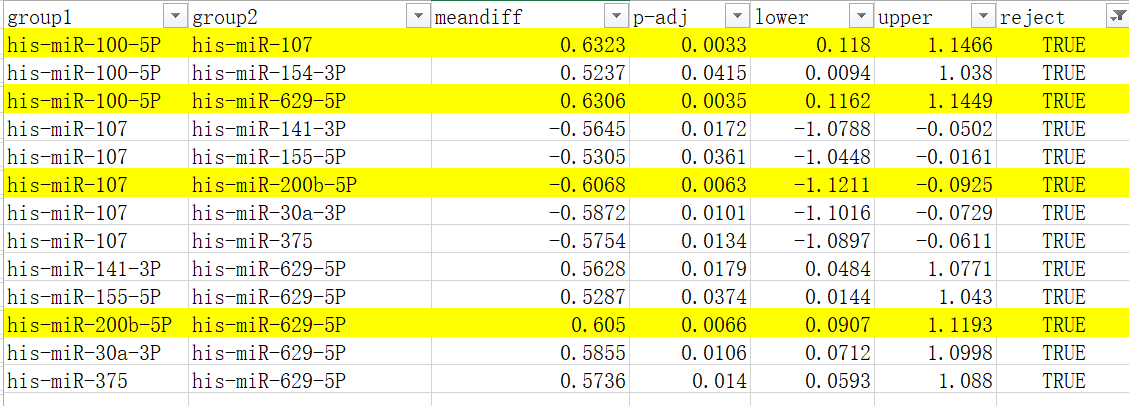

In [57]:
#  pairwise_tukeyhsd检测差异基因对
# 显著差异
diff_genes = ['his-miR-100-5P','his-miR-107','his-miR-141-3P','his-miR-155-5P',
              'his-miR-200b-5P','his-miR-30a-3P','his-miR-375','his-miR-154-3P',
              'his-miR-629-5P']

# 极显著差异
diff_genes2 = [ 'his-miR-100-5P', 'his-miR-107', 'his-miR-155-5P', 'his-miR-200b-5P',
                'his-miR-30a-3P', 'his-miR-375', 'his-miR-629-5P']



#### 多因素方差分析

```
参考：https://blog.csdn.net/maiyida123/article/details/117479531
```

In [58]:
# 疾病种类、疾病子类型，病情阶段、基因类型

# 制作数据集
data2_manov = data2[gene_names]
data2_manov.index = pd.Index(data2['code'].tolist(), name='code')
data2_manov.columns = pd.Index(gene_names, name='miRNA')
# data2_manov = data2_manov.stack().reset_index().rename(columns={0: 'exp'}).iloc[:, 1:]
data2_manov2 = data2_manov.stack().reset_index().rename(columns={0: 'exp'})
data2_manov1 = data2[['code', 'disease', 'subtype', 'stage']]
data2_manov_dt = pd.merge(data2_manov1, data2_manov2, on='code')
data2_manov_dt

,code,disease,subtype,stage,miRNA,exp
0,P001,lung,adenocarcinoma,invasive,his-miR-141-3P,0.7870
1,P001,lung,adenocarcinoma,invasive,his-miR-107,0.1305
2,P001,lung,adenocarcinoma,invasive,his-miR-574-3P,0.5664
3,P001,lung,adenocarcinoma,invasive,his-miR-181a-5P,0.1593
4,P001,lung,adenocarcinoma,invasive,his-miR-375,1.2212
...,...,...,...,...,...,...
762,P120,lung,adenocarcinoma,invasive,his-miR-378a-3P,1.2735
763,P120,lung,adenocarcinoma,invasive,his-miR-30a-3P,2.0269
764,P120,lung,adenocarcinoma,invasive,his-miR-200b-5P,0.4501
765,P120,lung,adenocarcinoma,invasive,his-miR-155-5P,2.2595


In [59]:

model_manov = ols('exp~C(disease) + C(subtype) + C(stage) + C(miRNA) +  C(disease):C(miRNA) + C(subtype):C(miRNA) + C(stage):C(miRNA) + C(disease):C(subtype) + C(disease):C(stage)', data2_manov_dt).fit()
anova_mf_anov_exp_table = anova_lm(model_manov) 
anova_mf_anov_exp_table

# 多因子方差分析结果



,df,sum_sq,mean_sq,F,PR(>F)
C(disease),1.0,59.121425,59.121425,100.778328,3.173382e-22
C(subtype),3.0,25.087700,8.362567,14.254824,5.073111e-09
C(stage),3.0,0.502548,0.167516,0.285547,8.358550e-01
C(miRNA),12.0,36.653721,3.054477,5.206658,2.043066e-08
C(disease):C(miRNA),12.0,22.454605,1.871217,3.189675,1.839501e-04
C(subtype):C(miRNA),36.0,19.527101,0.542419,0.924608,5.975786e-01
C(stage):C(miRNA),36.0,15.760267,0.437785,0.746248,8.608885e-01
C(disease):C(subtype),3.0,0.854323,0.284774,0.485426,6.925093e-01
C(disease):C(stage),3.0,1.505406,0.501802,0.855371,4.639770e-01
Residual,689.0,404.200609,0.586648,NaN,NaN


In [60]:
diff_genes = ['his-miR-100-5P','his-miR-107','his-miR-141-3P','his-miR-155-5P',
              'his-miR-200b-5P','his-miR-30a-3P','his-miR-375','his-miR-154-3P',
              'his-miR-629-5P']
data2_dgene = data2[['code', 'disease', 'subtype', 'stage',] + diff_genes]
data2_dgene_mirna = data2_dgene[diff_genes]
data2_dgene_mirna.index = pd.Index(data2_dgene['code'].tolist(), name='code')
data2_dgene_mirna.columns = pd.Index(diff_genes, name='miRNA')
data2_dgene_mirna = data2_dgene_mirna.stack().reset_index().rename(columns={0:'exp'})

data2_dgene_mirna = pd.merge(data2[['code', 'disease', 'subtype', 'stage']], data2_dgene_mirna, on='code')
data2_dgene_lung_mirna = data2_dgene_mirna[data2_dgene_mirna['disease']=='lung']

In [61]:
data2_dgene_lung_mirna

,code,disease,subtype,stage,miRNA,exp
0,P001,lung,adenocarcinoma,invasive,his-miR-100-5P,0.3266
1,P001,lung,adenocarcinoma,invasive,his-miR-107,0.1305
2,P001,lung,adenocarcinoma,invasive,his-miR-141-3P,0.7870
3,P001,lung,adenocarcinoma,invasive,his-miR-155-5P,0.3315
4,P001,lung,adenocarcinoma,invasive,his-miR-200b-5P,0.4194
...,...,...,...,...,...,...
526,P120,lung,adenocarcinoma,invasive,his-miR-200b-5P,0.4501
527,P120,lung,adenocarcinoma,invasive,his-miR-30a-3P,2.0269
528,P120,lung,adenocarcinoma,invasive,his-miR-375,1.8816
529,P120,lung,adenocarcinoma,invasive,his-miR-154-3P,0.6136


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'his-miR-100-5P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-141-3P'),
  Text(3, 0, 'his-miR-155-5P'),
  Text(4, 0, 'his-miR-200b-5P'),
  Text(5, 0, 'his-miR-30a-3P'),
  Text(6, 0, 'his-miR-375'),
  Text(7, 0, 'his-miR-154-3P'),
  Text(8, 0, 'his-miR-629-5P')])

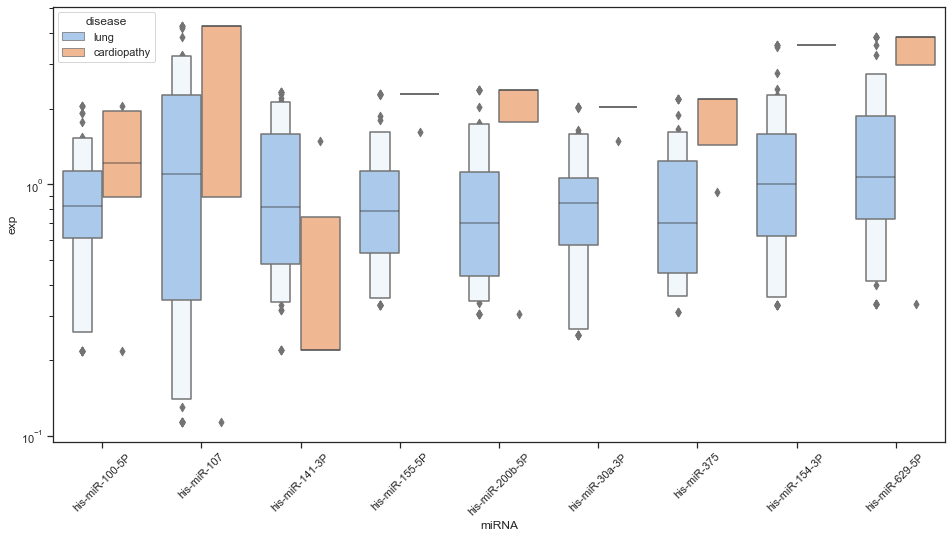

In [62]:
# 
f, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale("log")
sns.boxenplot(x='miRNA', y='exp', hue='disease', data=data2_dgene_mirna, palette="pastel")
plt.xticks(rotation='45')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'his-miR-100-5P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-141-3P'),
  Text(3, 0, 'his-miR-155-5P'),
  Text(4, 0, 'his-miR-200b-5P'),
  Text(5, 0, 'his-miR-30a-3P'),
  Text(6, 0, 'his-miR-375'),
  Text(7, 0, 'his-miR-154-3P'),
  Text(8, 0, 'his-miR-629-5P')])

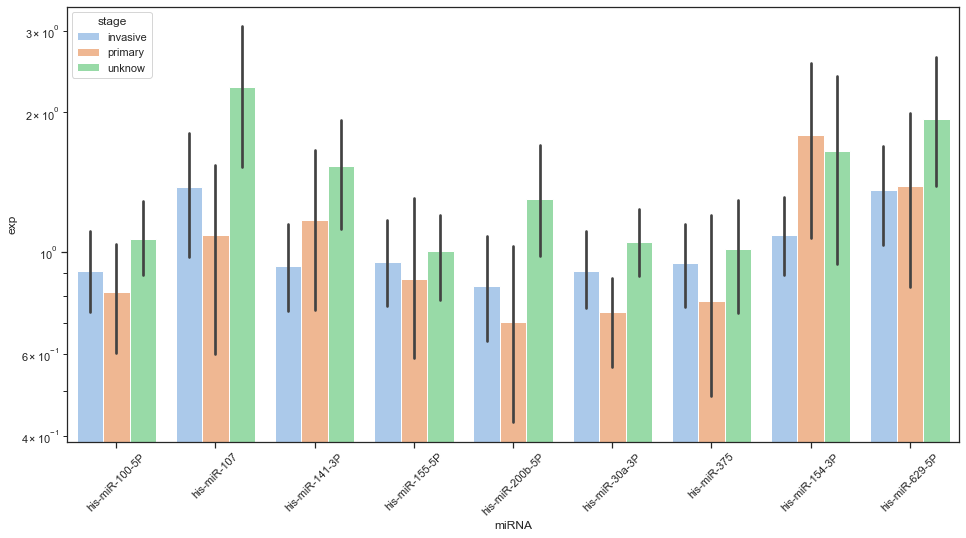

In [63]:
# 
f, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale("log")

sns.barplot(x='miRNA', y='exp', data=data2_dgene_lung_mirna, hue='stage', palette="pastel")
plt.xticks(rotation='45')



d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'his-miR-100-5P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-141-3P'),
  Text(3, 0, 'his-miR-155-5P'),
  Text(4, 0, 'his-miR-200b-5P'),
  Text(5, 0, 'his-miR-30a-3P'),
  Text(6, 0, 'his-miR-375'),
  Text(7, 0, 'his-miR-154-3P'),
  Text(8, 0, 'his-miR-629-5P')])

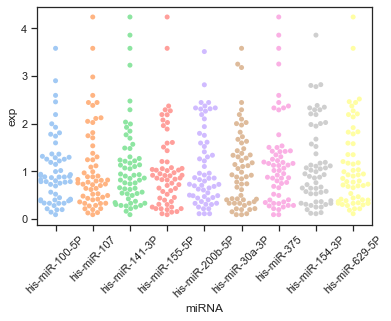

In [64]:
sns.swarmplot(x=data2_dgene_mirna['miRNA'], y=all_sample_exp['exp'], palette="pastel")
plt.xticks(rotation='45')



<AxesSubplot:xlabel='exp', ylabel='miRNA'>

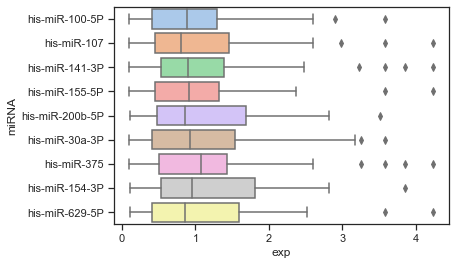

In [65]:
sns.boxplot(y=data2_dgene_mirna['miRNA'], x=all_sample_exp['exp'], palette="pastel")

## 肺癌
```
```

In [66]:
lung = data[data['disease']=='lung']
lung_des = lung.describe().reset_index()

# 肺癌-平均值
all_lung_mean_expression = lung_des[lung_des['index'] == 'mean'].drop(columns=['index']).T.reset_index()
all_lung_mean_expression.rename(columns={"index": "miRNA", 1: "exp"}, inplace=True)
all_lung_mean_expression


,miRNA,exp
0,his-miR-141-3P,1.112974
1,his-miR-107,1.558048
2,his-miR-574-3P,1.302257
3,his-miR-181a-5P,1.048031
4,his-miR-375,1.426561
5,his-miR-629-5P,1.807985
6,his-miR-100-5P,0.935476
7,his-miR-154-3P,1.365457
8,his-miR-378a-3P,1.300554
9,his-miR-30a-3P,1.043011


d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'his-miR-141-3P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-574-3P'),
  Text(3, 0, 'his-miR-181a-5P'),
  Text(4, 0, 'his-miR-375'),
  Text(5, 0, 'his-miR-629-5P'),
  Text(6, 0, 'his-miR-100-5P'),
  Text(7, 0, 'his-miR-154-3P'),
  Text(8, 0, 'his-miR-378a-3P'),
  Text(9, 0, 'his-miR-30a-3P'),
  Text(10, 0, 'his-miR-200b-5P'),
  Text(11, 0, 'his-miR-155-5P'),
  Text(12, 0, 'his-miR-21-5P')])

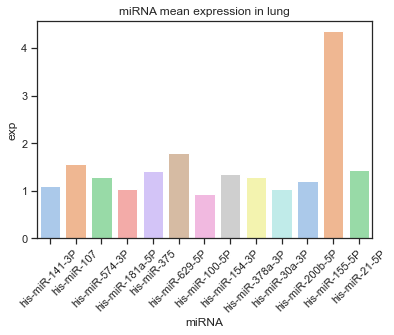

In [67]:
# 肺癌各基因平均表达量
sns.barplot(all_lung_mean_expression['miRNA'], y=all_lung_mean_expression['exp'], palette="pastel")
plt.title('miRNA mean expression in lung')
plt.xticks(rotation='45')

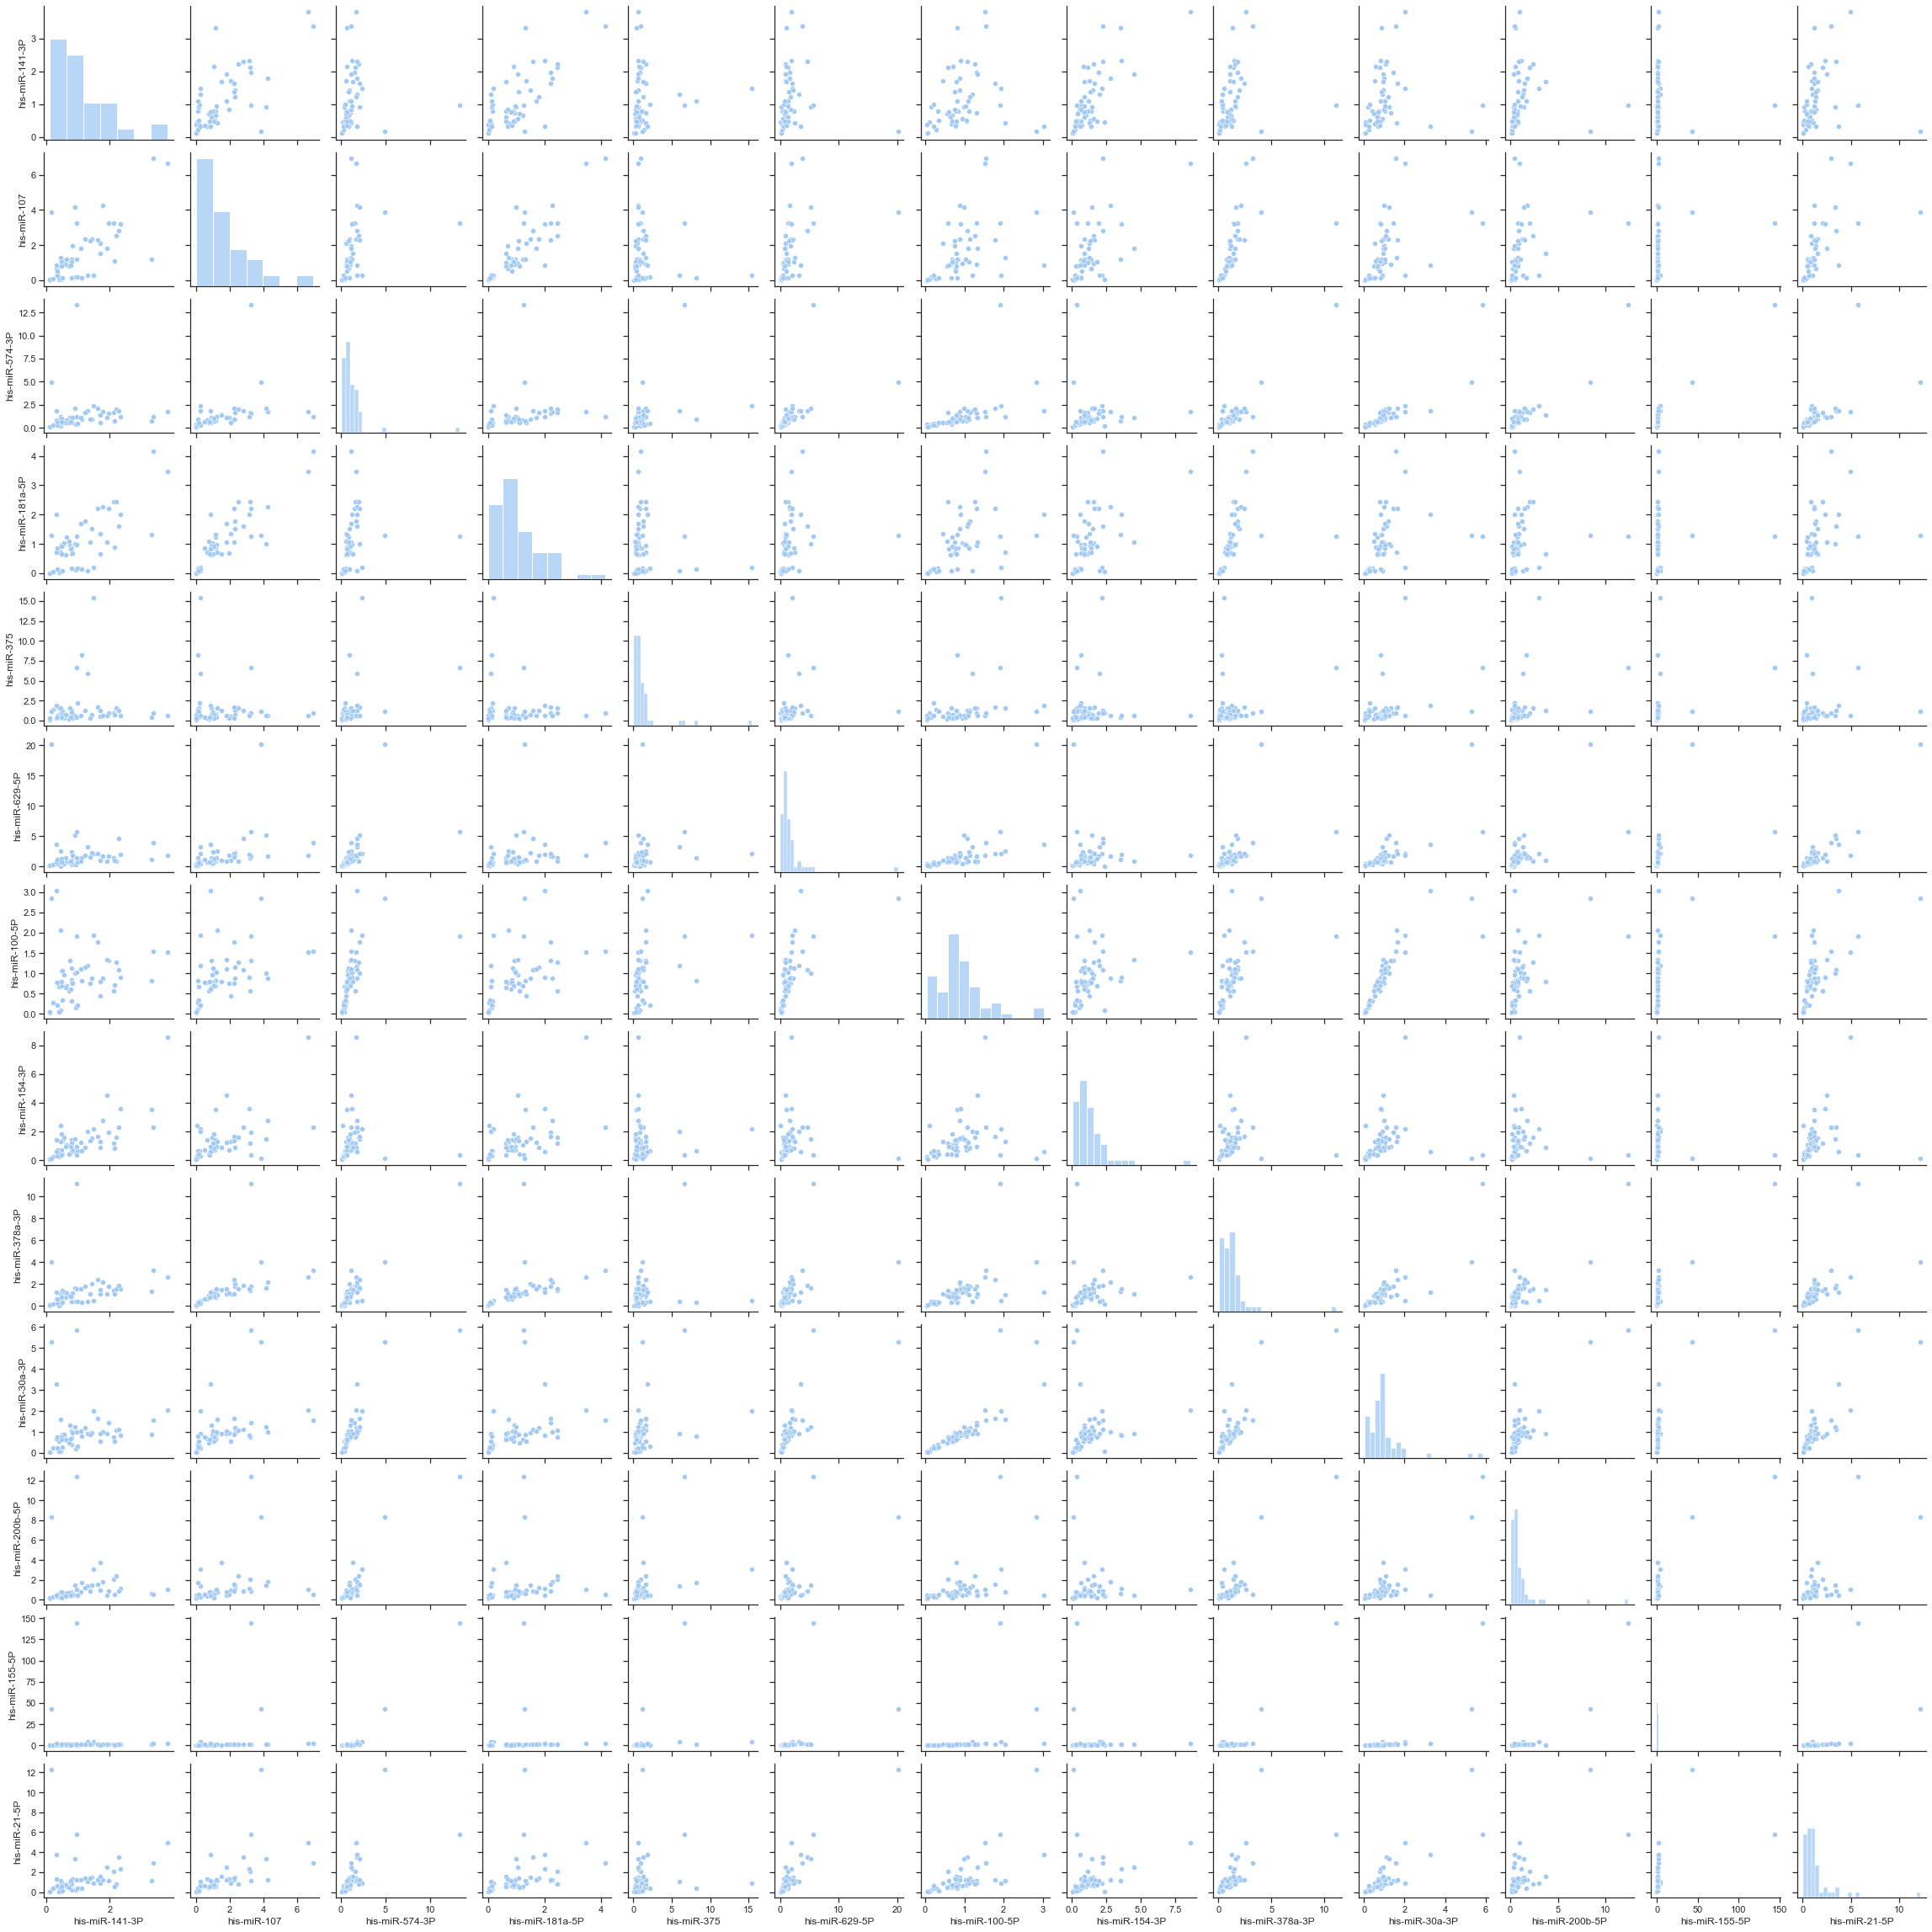

In [68]:
sns.pairplot(lung)

<AxesSubplot:xlabel='subtype', ylabel='his-miR-574-3P'>

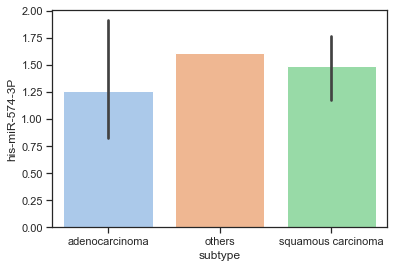

In [69]:
sns.barplot(x=lung['subtype'], y=lung['his-miR-574-3P'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'his-miR-141-3P'),
  Text(1, 0, 'his-miR-107'),
  Text(2, 0, 'his-miR-574-3P'),
  Text(3, 0, 'his-miR-181a-5P'),
  Text(4, 0, 'his-miR-375'),
  Text(5, 0, 'his-miR-629-5P'),
  Text(6, 0, 'his-miR-100-5P'),
  Text(7, 0, 'his-miR-154-3P'),
  Text(8, 0, 'his-miR-378a-3P'),
  Text(9, 0, 'his-miR-30a-3P'),
  Text(10, 0, 'his-miR-200b-5P'),
  Text(11, 0, 'his-miR-155-5P'),
  Text(12, 0, 'his-miR-21-5P')])

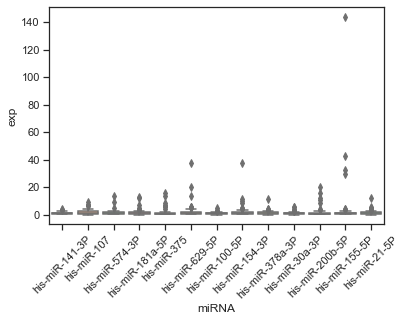

In [70]:
# 使用 melt转化矩阵
m_exp = data[['his-miR-141-3P', 'his-miR-107',
       'his-miR-574-3P', 'his-miR-181a-5P', 'his-miR-375', 'his-miR-629-5P',
       'his-miR-100-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-30a-3P',
       'his-miR-200b-5P', 'his-miR-155-5P', 'his-miR-21-5P']]

m_exp = m_exp.melt(var_name='miRNA', value_name='exp')
m_exp['log_exp'] = m_exp['exp'].apply(lambda x: np.log(1 + x))
sns.boxplot(x = 'miRNA', y = 'exp', data = m_exp, palette="pastel")
plt.xticks(rotation='45')

In [71]:
data[data['disease']=='cardiopathy']

,code,disease,subtype,stage,his-miR-141-3P,his-miR-107,his-miR-574-3P,his-miR-181a-5P,his-miR-375,his-miR-629-5P,his-miR-100-5P,his-miR-154-3P,his-miR-378a-3P,his-miR-30a-3P,his-miR-200b-5P,his-miR-155-5P,his-miR-21-5P
21,P048,cardiopathy,cardiopathy,cardiopathy,0.1795,0.0082,2.0979,6.9131,5.6449,0.1238,0.8876,11.2652,1.2406,2.6564,20.2251,2.2944,1.3097
32,P068,cardiopathy,cardiopathy,cardiopathy,1.4911,6.3282,2.8182,4.6546,1.4330,13.4320,0.2177,9.5530,3.7629,1.4818,15.7749,1.6140,1.6323
34,P070,cardiopathy,cardiopathy,cardiopathy,0.0690,6.8257,1.2098,12.3061,3.7757,5.3190,1.9510,4.0076,3.5000,2.3570,0.2967,3.4460,2.3097
35,P071,cardiopathy,cardiopathy,cardiopathy,0.2071,9.3537,2.8042,12.5377,0.9346,2.9825,1.2141,37.2576,0.8709,3.4012,1.7698,32.7764,2.4645
45,P093,cardiopathy,cardiopathy,cardiopathy,0.7456,0.8889,9.3776,0.6153,13.3832,37.2974,4.4294,4.4242,1.7664,3.2015,10.7315,29.5224,2.5484


## 特征筛选

In [156]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import chi2,f_regression # 卡方值计算
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # 用于分类
# from sklearn.feature_selection import f_regression # 用于回归

In [73]:
def get_targets(df, col_name):
    """"""

    name_counter = Counter(df[col_name].tolist())
    name_dict = dict([k, i] for i, k in enumerate(name_counter))
    print("counter: ", name_counter)
    print("name_dict: ", name_dict)
    df['target'] = df[col_name].apply(lambda x: name_dict.get(x))
    
    return df



In [104]:
data2_feats = data2
data2_feats = get_targets(data2_feats, 'stage')


# 转化格式
mirna_x = []
mirna_y = []
# for i, row in enumerate(data2_feats.itertuples()):
    #  his-miR-141-3P ~ his-miR-21-5P
    # exp = list(row[3:-1])
    # mirna_y.append(row[-1])
    # mirna_x.append(exp)

# mirna_x = np.array(mirna_x)
# mirna_y = np.array(mirna_y)

mirna_x = data2_feats.iloc[:, 4:-1].values
mirna_y = data2_feats.iloc[:, -1:].values.squeeze()

counter:  Counter({'invasive': 38, 'primary': 8, 'unknow': 8, 'cardiopathy': 5})
name_dict:  {'invasive': 0, 'primary': 1, 'cardiopathy': 2, 'unknow': 3}


In [107]:
# iris = load_iris()
# X = iris.data
# y = iris.target
X = mirna_x
y = mirna_y

# 打印数据集中的特征数和每个特征的方差
print('原数据集中的特征数：\n', X.shape[1], '\n')
print('原数据集中不同特征的方差：\n', np.var(X, axis=0), '\n')

# 使用VarianceThreshold来过滤掉方差在0.6以下的特征
selector = VarianceThreshold(threshold=0.6)
X_new = selector.fit_transform(X)

# 打印新数据集的特征数
print('方差阈值法选择的特征数：\n', X_new.shape[1])


# 类似解析：
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
# 相关性权重：
print(selector.estimator_.coef_)
print("特征筛选器过滤值：", selector.threshold_)
print("选择特征：", selector.get_support())
# 具有最高绝对值的特征coef_被认为是最重要
## 只选择第0,2，...等5个特征
idx = [i for i, v in enumerate(selector.get_support()) if v]
print([gene_names[i] for i in idx])
importance = np.abs(selector.estimator_.coef_).squeeze()
print("importance: ", importance)
# 筛选后的特征
# selector.transform(X) #将特征选择器 用于输入数据，获得特征数据集

原数据集中的特征数：
 13 

原数据集中不同特征的方差：
 [0.46036137 1.84253848 0.51484556 0.62582377 0.38335072 1.34598285
 0.28228742 1.13759496 0.49581206 0.31282908 0.48326502 0.4075259
 0.73586807] 

方差阈值法选择的特征数：
 5
[[ 0.05755559  0.51863398  0.03886649 -0.276223    0.12676465 -0.77622666
   0.05949025 -0.94623177 -0.38008661  0.34157727 -0.56230086  0.55116999
   0.04533851]
 [ 0.28741408 -0.54356156 -0.56358924 -0.37359062 -0.56879623  0.25792451
  -0.05769072  0.24740712 -0.12945816 -0.38439118 -0.19042632  0.02364112
   0.17788779]
 [-0.78773093  0.0598178   0.41097034  0.44749799  0.44513086  0.34190804
  -0.18716243  1.03597376  0.07633316  0.29855226  0.36984187  0.35436406
  -0.05845171]
 [ 0.44276126 -0.03489022  0.11375241  0.20231563 -0.00309928  0.17639411
   0.1853629  -0.33714911  0.43321161 -0.25573834  0.38288531 -0.92917516
  -0.16477459]]
特征筛选器过滤值： 1.3093453391452077
选择特征： [ True False False False False  True False  True False False  True  True
 False]
['his-miR-141-3P', 'his-miR-629-5P'

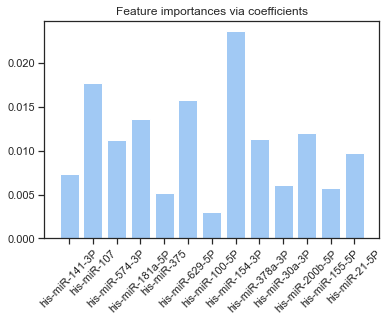

In [112]:
# 特征选择器
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(gene_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation='45')
plt.show()

In [113]:
# 对重要性进行排名
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01
print('阈值为',threshold)
idx_features = (-importance).argsort()[:2]
name_features = np.array(gene_names)[idx_features]
print('重要性第三大的特征: {}'.format(name_features))


阈值为 0.025743241486457603
重要性第三大的特征: ['his-miR-154-3P' 'his-miR-107']


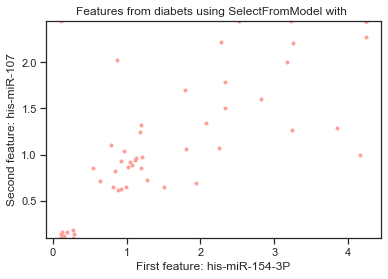

In [114]:
plt.title("Features from diabets using SelectFromModel with ")
feature1 = X_new[:, 0]
feature2 = X_new[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()


In [ ]:
# # 特征筛选前后分类效果比较
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print('准确率：', acc)

# print("新数据 ---- ")
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=101)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print('准确率：', acc)


In [ ]:
# https://blog.csdn.net/m0_37316673/article/details/107524247

In [117]:
def eval_RF(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('准确率：', acc)
    print("f1_score: ", f1_score(y_test, y_pred, average='macro'))

eval_RF(X, y)

准确率： 0.5333333333333333
f1_score:  0.3333333333333333


准确率： 0.8666666666666667
f1_score:  0.9285714285714286


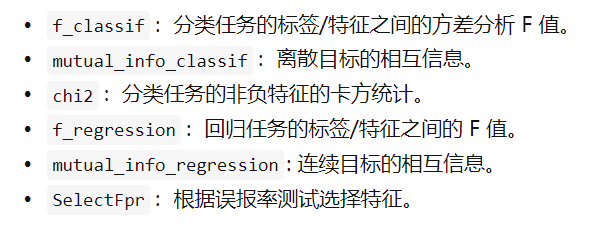

d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarn

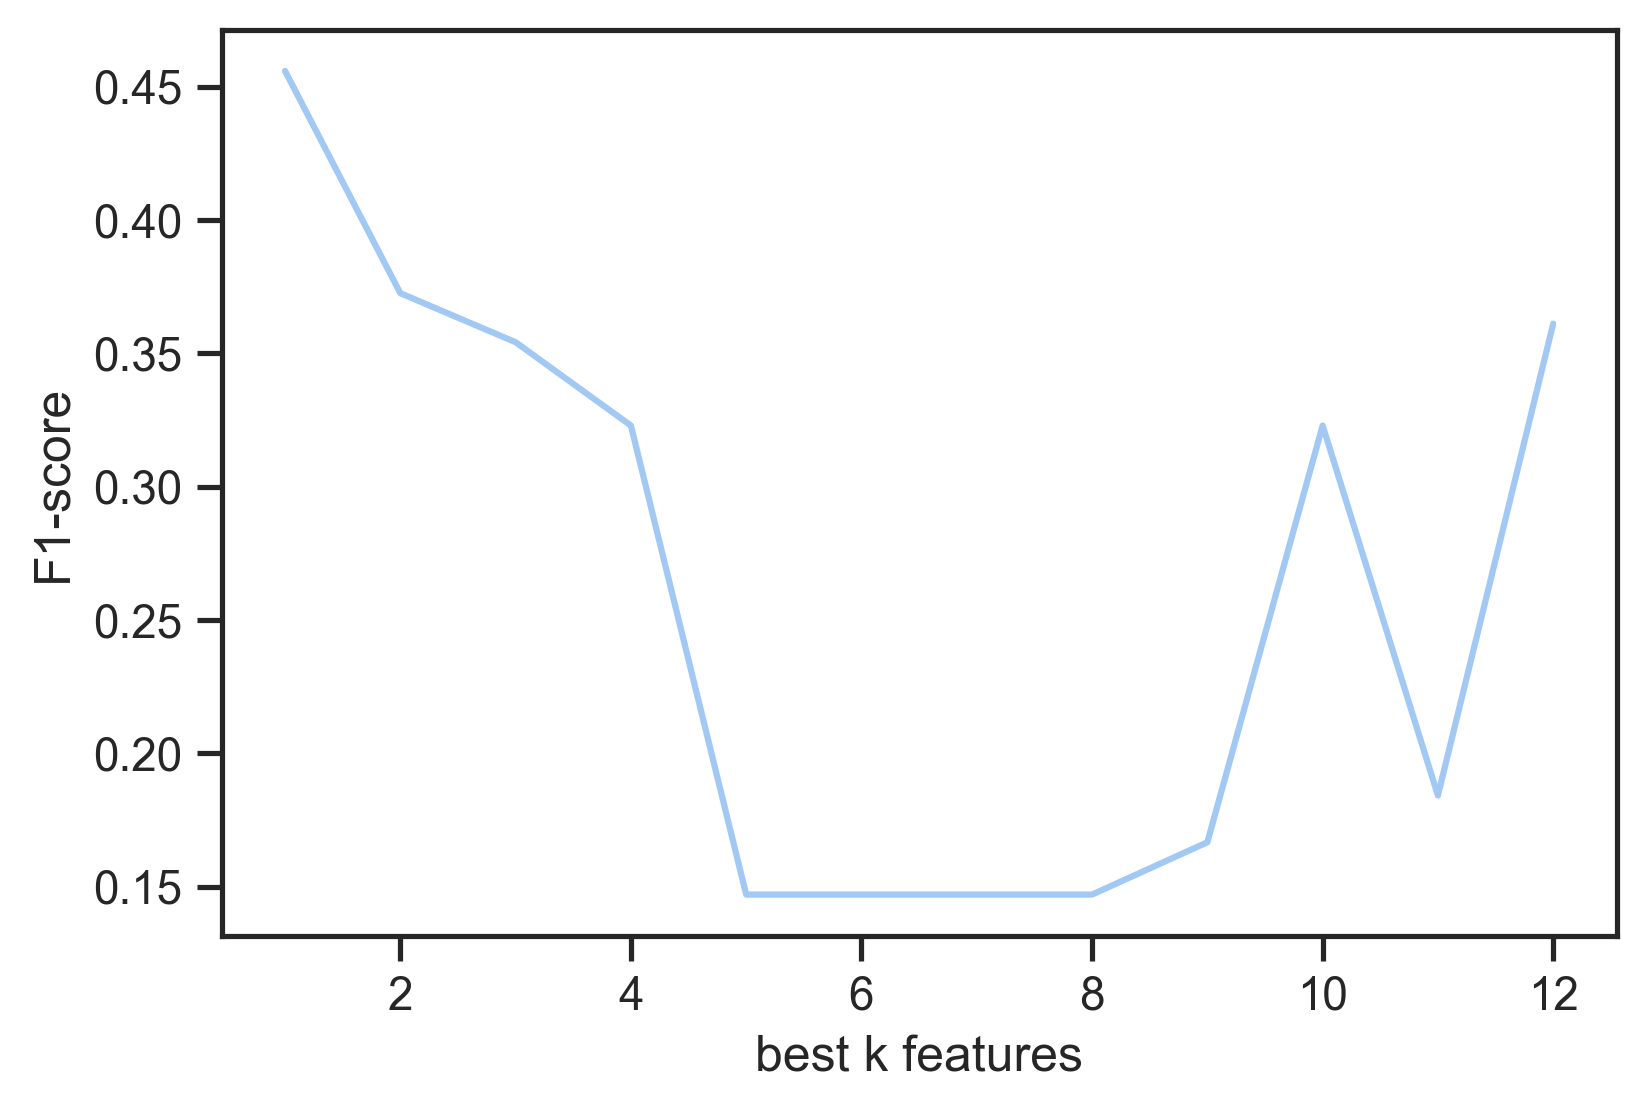

In [167]:
import sklearn.feature_selection as fs
import sklearn.feature_selection as fs
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt



# 选择最佳特征个数
# choose the f_classif as the metric and K is 3
f1_list = []
max_k = 13
for k in range(1, max_k):
    bk = fs.SelectKBest(fs.chi2, k)
    bk.fit(X, y)
    X_new = bk.transform(X)
    train_x, test_x, train_y, test_y = train_test_split(X_new, y, test_size=0.2, random_state=42)
    # 平均函数
    # lr = LogisticRegression()
    lr = RandomForestClassifier()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    f1 = metrics.f1_score(test_y, y_pred, average='macro')
    f1_list.append(f1)

fig, axe = plt.subplots(dpi = 300)
axe.plot(range(1, max_k), f1_list)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-score")
plt.show()


In [155]:
#### 特征选择

# 1.过滤法: 方差(非标准差), 使用np.nanvar
print("----------- 方差 ")
VTS = VarianceThreshold(0.6) #默认方差阈值为0
X_new = VTS.fit_transform(X)
print("VTS.variances_: ", VTS.variances_)
findex = [i for i, v in enumerate(VTS.get_support()) if v]
print("特征：", [gene_names[i] for i in findex])
eval_RF(X_new, y)

# 2. 相关性过滤：
print("----------- 卡方 ")
# https://zhuanlan.zhihu.com/p/504102559
# https://blog.csdn.net/m0_53027469/article/details/127809520
selector = SelectKBest(chi2, k=5) # 5个最佳
X_new = selector.fit_transform(X, y)
idx = np.where(np.array(selector.get_support().astype(int))==1)[0]
# 得分输出为
# print("scores_: ", selector.scores_ ) # 筛选高分特征
# print("pvalues_: ", selector.pvalues_)
print("特征：", np.array(gene_names)[idx])

eval_RF(X_new, y)


print("----------- SelectFromModel - svc -l1  ")
# 使用 SelectFromModel 选取特征
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
idx = np.where(np.array(model.get_support().astype(int))==1)[0]
print("特征选择：", model.get_support(), "索引：", idx )
print("l1: ", X_new.shape)
print("特征：", np.array(gene_names)[idx])
eval_RF(X_new, y)


from sklearn.linear_model import LinearRegression, LogisticRegression

model = SelectFromModel(LogisticRegression(penalty="l2", C=0.1)).fit(X, y)
X_new = model.transform(X)
idx = np.where(np.array(model.get_support().astype(int))==1)[0]
print("特征选择：", model.get_support(), "索引：", idx )
print("LogisticRegression: ", X_new.shape)
print("特征：", np.array(gene_names)[idx])
eval_RF(X_new, y)


from sklearn.ensemble import GradientBoostingClassifier
model = SelectFromModel(GradientBoostingClassifier()).fit(X, y)
X_new = model.transform(X)
idx = np.where(np.array(model.get_support().astype(int))==1)[0]
print("特征选择：", model.get_support(), "索引：", idx )
print("GradientBoostingClassifier: ", X_new.shape)
print("特征：", np.array(gene_names)[idx])
eval_RF(X_new, y)







print("----------- SelectFromModel - svc -l2  ")
# 使用 SelectFromModel 选取特征
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
idx = np.where(np.array(model.get_support().astype(int))==1)[0]
print("特征选择：", model.get_support(), "索引：", idx )
print("l2: ", X_new.shape)
print("特征：", np.array(gene_names)[idx])
eval_RF(X_new, y)


print("\n" * 10)
print("----------- SelectFromModel - ExtraTreesClassifier  ")
# 基于 Tree（树）的特征选取
# 基于树的 estimators （查阅 sklearn.tree 模块和树的森林 在 sklearn.ensemble 模块） 可以用来计算特征的重要性，
# 然后可以消除不相关的特征（当与 sklearn.feature_selection.SelectFromModel 等元转换器一同使用时）:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
print("Tree特征重要性：", clf.feature_importances_  )
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
idx = np.where(np.array(model.get_support().astype(int))==1)[0]
print("X_new.shape: ", X_new.shape, "选择：", model.get_support())
print("特征：", np.array(gene_names)[idx])
eval_RF(X_new, y)


# print("----------- pipeline  ")
# 特征选取作为 pipeline
# clf = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
#   ('classification', RandomForestClassifier())
# ])
# clf = clf.fit(X, y)
print(clf.score(X, y))
# 


----------- 方差 
VTS.variances_:  [0.46036137 1.84253848 0.51484556 0.62582377 0.38335072 1.34598285
 0.28228742 1.13759496 0.49581206 0.31282908 0.48326502 0.4075259
 0.73586807]
特征： ['his-miR-107', 'his-miR-181a-5P', 'his-miR-629-5P', 'his-miR-154-3P', 'his-miR-21-5P']
准确率： 0.5333333333333333
f1_score:  0.3333333333333333
----------- 卡方 
特征： ['his-miR-107' 'his-miR-574-3P' 'his-miR-181a-5P' 'his-miR-629-5P'
 'his-miR-154-3P']
准确率： 0.6
f1_score:  0.4666666666666667
----------- FPR检验 
准确率： 0.6666666666666666
f1_score:  0.5194444444444445
f_classif: 
准确率： 0.5333333333333333
f1_score:  0.43333333333333324
mutual_info_classif2: 


d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


准确率： 0.5333333333333333
f1_score:  0.44956140350877194
mutual_info_classif3: 
准确率： 0.4666666666666667
f1_score:  0.40555555555555556
----------- SelectFromModel - svc -l1  
特征选择： [False  True False False False  True False  True False False False False
 False] 索引： [1 5 7]
l1:  (59, 3)
特征： ['his-miR-107' 'his-miR-629-5P' 'his-miR-154-3P']
准确率： 0.6
f1_score:  0.4666666666666667
特征选择： [ True False False  True False False False  True False False  True  True
 False] 索引： [ 0  3  7 10 11]
LogisticRegression:  (59, 5)
特征： ['his-miR-141-3P' 'his-miR-181a-5P' 'his-miR-154-3P' 'his-miR-200b-5P'
 'his-miR-155-5P']
准确率： 0.6
f1_score:  0.4666666666666667
特征选择： [ True False False  True False False False  True  True False False False
 False] 索引： [0 3 7 8]
GradientBoostingClassifier:  (59, 4)
特征： ['his-miR-141-3P' 'his-miR-181a-5P' 'his-miR-154-3P' 'his-miR-378a-3P']
准确率： 0.6
f1_score:  0.4666666666666667
----------- SelectFromModel - svc -l2  
特征选择： [ True False False False  True False  True  True Fals

In [145]:

model = SelectFromModel(LogisticRegression(penalty="l2", C=0.1)).fit(X, y)
X_new = model.transform(X)
idx = np.where(np.array(model.get_support().astype(int))==1)[0]
print("特征选择：", model.get_support(), "索引：", idx )
print("LogisticRegression: ", X_new.shape)
print("特征：", np.array(gene_names)[idx])
eval_RF(X_new, y)


特征选择： [ True False False  True False False False  True False False  True  True
 False] 索引： [ 0  3  7 10 11]
LogisticRegression:  (59, 5)
特征： ['his-miR-141-3P' 'his-miR-181a-5P' 'his-miR-154-3P' 'his-miR-200b-5P'
 'his-miR-155-5P']
准确率： 0.6
f1_score:  0.4666666666666667


In [ ]:
VTS.variances_

array([0.46036137, 1.84253848, 0.51484556, 0.62582377, 0.38335072,
       1.34598285, 0.28228742, 1.13759496, 0.49581206, 0.31282908,
       0.48326502, 0.4075259 , 0.73586807])